In [8]:
import igraph 
import numpy as np
import pandas as pd
import itertools
import collections
from sklearn.metrics.pairwise import cosine_similarity
import gensim 
import lda
import re
from matplotlib.collections import PatchCollection
from matplotlib import cm

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
import pylab as plt
import openpyxl
import random
import lxml

import networkx as nx
import time
import os
import sys
import random
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from scipy import stats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_score, LeaveOneOut
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer, accuracy_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import scipy.cluster.hierarchy as sch
from dictances import bhattacharyya

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


import json
import networkx
from pgmpy.models import BayesianModel


def move_files(abs_dirname, num_cv_folds):
    """Move files into subdirectories."""
    
    files = [os.path.join(abs_dirname, f) for f in os.listdir(abs_dirname)]
    N = round(len(files)/num_cv_folds)
    i = 0
    curr_subdir = None
    shuffle(files)
    print(len(files))
    for f in files:
        # create new subdir if necessary
        if i % N == 0:
            subdir_name = os.path.join(abs_dirname, '{0:f}'.format(i / N + 1))
            os.mkdir(subdir_name)
            curr_subdir = subdir_name

        # move file to current dir
        f_base = os.path.basename(f)
        shutil.copy(f, os.path.join(subdir_name, f_base))
        i += 1
        
def prepare_files_for_mallet_cv(abs_dirname, num_folders_train):

    files = [os.path.join(abs_dirname, f) for f in os.listdir(abs_dirname)]

    i = 0
    curr_subdir = None
    shuffle(files)
    print(len(files))
    for f in files:
        # create new subdir if necessary
        if i % N == 0:
            subdir_name = os.path.join(abs_dirname, '{0:f}'.format(i / N + 1))
            os.mkdir(subdir_name)
            curr_subdir = subdir_name

        # move file to current dir
        f_base = os.path.basename(f)
        shutil.copy(f, os.path.join(subdir_name, f_base))
        i += 1


def make_new_folder(folder_name, parent_folder):
      
    # Path
    path = os.path.join(parent_folder, folder_name)
      
    # Create the folder
    # 'new_folder' in
    # parent_folder
    try: 
        # mode of the folder
        mode = 0o777
  
        # Create folder
        os.mkdir(path, mode) 
    except OSError as error: 
        print(error)
        
        

from collections import defaultdict
def load_topic_word_distributions(word_weight_path):
    
    topic_word_weight_dict = defaultdict(lambda: defaultdict(float))
    topic_sum_dict = defaultdict(float)
    with open(word_weight_path,'r') as f:       
        for _line in f:        
            _topic, _word, _weight = _line.split('\t')
            topic_word_weight_dict[_topic][_word] = float(_weight)
            topic_sum_dict[_topic] += float(_weight)

    topic_word_probability_dict = defaultdict(lambda: defaultdict(float))
    for _topic, _word_weight_dict in topic_word_weight_dict.items():
        for _word, _weight in _word_weight_dict.items():
            topic_word_probability_dict[int(_topic)][_word] = _weight / topic_sum_dict[_topic]

    return topic_word_probability_dict


# def func_coherence_umass(X, aggr_top_words, n_top_words):
#     aggr_sum = 0
#     const = 2/n_top_words/(n_top_words - 1)
#     for i in range(2, n_top_words + 1):
#         for j in range(1, i):
#             wi = aggr_top_words[i - 1]
#             wj = aggr_top_words[j - 1]        
#             aggr_sum += func_log_umass(wi, wj, X)

#     return  const*aggr_sum

# def comb_func_log_umass(wi, wj, X):
#     eps = 0.01
#     p_wj = (X[wj] != 0).astype(int).sum(axis=0)/X.shape[0]
#     p_wi = (X[wi] != 0).astype(int).sum(axis=0)/X.shape[0]
#     p_wiwj = len(X.loc[(X.loc[:,wi] != 0) & (X.loc[:,wj] != 0), [wi, wj]])/X.shape[0]
#     return np.log2(p_wiwj/p_wi/p_wj + eps)/np.log2(p_wiwj + eps) #might need - sign

# def comb_func_coherence_umass(X, top_words, n_top_words):
#     aggr_sum = 0
#     const = 2/n_top_words/(n_top_words - 1)
#     for i in range(1, n_top_words + 1):
#         for j in range(i+1, n_top_words + 1):
#             wi = top_words[i - 1]
#             wj = top_words[j - 1]        
#             aggr_sum += comb_func_log_umass(wi, wj, X)

#     return  const*aggr_sum

# def avg_comb_func_coherence_umass(X, topic_list, n_topics, n_top_words):
#     aggr_sum = 0
#     for i in range(0, n_topics):
#         print(i, comb_func_coherence_umass(X, topic_list[i], n_top_words))
#         aggr_sum += comb_func_coherence_umass(X, topic_list[i], n_top_words)
#     return  aggr_sum/n_topics


# def avg_comb_func_coherence_umass(X, topic_list, n_top_words):
#     aggr_sum = 0
#     for i in range(0, len(topic_list)):
#         #print(i, comb_func_coherence_umass(X, topic_list[i], n_top_words))
#         aggr_sum += comb_func_coherence_umass(X, topic_list[i], n_top_words)
#     return  aggr_sum/len(topic_list)



In [9]:
#load data
df_abund = pd.read_csv("data/Coral_AbundanceTaxa_all_samples.txt", sep = '\t')
df_meta = pd.read_csv("data/Coral_metadata.txt", sep = '\t')
list(set(df_abund.columns) - set(df_meta['SampleID']))
list(set(df_meta['SampleID']) - set(df_abund.columns))
df_abund
df_meta

['Taxonomy', 'ASV_identifier']

['P9iexposed071717_S105']

ASV_identifier  \
0     186680024e48626f8f465c2bf0fe742b   
1     e6af9bdccdd4916435b9407afff0aaa4   
2     ad652272b9874d7c85e2fb56a4367a84   
3     1863975e5fc361e26995bb1de91fa109   
4     423939231695191d7b153381618b5010   
...                                ...   
4512  43ea55dbffd7a911bd2bc202fd4b7f60   
4513  7188e88f642239227891117465f01c68   
4514  05d9f5bc6a7279d1e20f4ea6508d0631   
4515  bb4e42a01f3e953641493d2bad4e746f   
4516  a28b1cf6b9c9764f980bf572149c7780   

                                               Taxonomy  \
0     d__Bacteria;p__Proteobacteria;c__Gammaproteoba...   
1     d__Bacteria;p__Proteobacteria;c__Alphaproteoba...   
2     d__Bacteria;p__Proteobacteria;c__Deltaproteoba...   
3     d__Bacteria;p__Proteobacteria;c__Deltaproteoba...   
4     d__Bacteria;p__Proteobacteria;c__Alphaproteoba...   
...                                                 ...   
4512  d__Bacteria;p__Proteobacteria;c__Gammaproteoba...   
4513  d__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...   
4514  d__Bacteria;p__Proteobacteria;c__Alphaproteoba...   
4515  d__Bacteria;p__Proteobacteria;c__Alphaproteoba...   
4516  d__Bacteria;p__Planctomycetes;c__Phycisphaerae...   

      C14iexposed071717L_S1  C14jexposed071717L_S2  C14kexposed071717L_S3  \
0                         0                      0                     21   
1                         0                      0                      0   
2                         0                      0                      0   
3                         0                      0                      0   
4                         0                      0                      0   
...                     ...                    ...                    ...   
4512                      0                      0                      0   
4513                     17                      0                      0   
4514                      0                      0                      0   
4515                      0                      0                      6   
4516                      0                      0                      0   

      C17abaseline070217H_S17  C17aexposed072817H_S4  C17bexposed072817H_S5  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                    109   
4                           0                      0                      0   
...                       ...                    ...                    ...   
4512                        0                      0                      0   
4513                        2                      0                      0   
4514                        0                      0                      0   
4515                        0                      0                      0   
4516                        0                      0                      0   

      C17cexposed072817H_S6  C17dbaseline070217H_S18  ...  \
0                         0                        0  ...   
1                         0                        0  ...   
2                         0                        0  ...   
3                         0                        0  ...   
4                         0                        0  ...   
...                     ...                      ...  ...   
4512                      0                        0  ...   
4513                      0                        0  ...   
4514                      0                        0  ...   
4515                      0                        0  ...   
4516                      0                        0  ...   

      P8bexposed071717H_S85  P8dbaseline062217H_S86  P8dexposed071717H_S87  \
0                        40                       0                      0   
1                         0                    

SampleID                ALTID BarcodeSequence  \
0                  neg_S106                  neg    GTGCCGGCCGAC   
1   C18abaseline070217M_S19  C18abaseline070217M    GGTTGCCCTGTA   
2   C18cbaseline070217M_S15  C18cbaseline070217M    ACTCGCTCGCTG   
3     C18cexposed072817M_S8   C18cexposed072817M    AATTTAGGTAGG   
4     C18dexposed072817M_S9   C18dexposed072817M    GACTCAACCAGT   
..                      ...                  ...             ...   
91     P9eexposed071727_S91     P9eexposed071727    GAACCAGTACTC   
92    P9gbaseline062217_S92    P9gbaseline062217    CGCACCCATACA   
93     P9gexposed071717_S93     P9gexposed071717    GTGCCATAATCG   
94    P9ibaseline062217_S94    P9ibaseline062217    ACTCTTACTTAG   
95    P9iexposed071717_S105     P9iexposed071717    GTTCATTAAACT   

   ForwardPrimerPad ForwardPrimerLinker   515FBForwardPrimer  BarcodeNumber  \
0        TATGGTAATT                  GT  GTGYCAGCMGCCGCGGTAA            109   
1        TATGGTAATT                  GT  GTGYCAGCMGCCGCGGTAA             18   
2        TATGGTAATT                  GT  GTGYCAGCMGCCGCGGTAA             14   
3        TATGGTAATT                  GT  GTGYCAGCMGCCGCGGTAA              7   
4        TATGGTAATT                  GT  GTGYCAGCMGCCGCGGTAA              8   
..              ...                 ...                  ...            ...   
91       TATGGTAATT                  GT  GTGYCAGCMGCCGCGGTAA             92   
92       TATGGTAATT                  GT  GTGYCAGCMGCCGCGGTAA             93   
93       TATGGTAATT                  GT  GTGYCAGCMGCCGCGGTAA             94   
94       TATGGTAATT                  GT  GTGYCAGCMGCCGCGGTAA             95   
95       TATGGTAATT                  GT  GTGYCAGCMGCCGCGGTAA            108   

     BarcodeID  PlateNumber      project_name  ...  \
0   515rcbc109            2  coral_resistance  ...   
1    515rcbc18            1  coral_resistance  ...   
2    515rcbc14            1  coral_resistance  ...   
3     515rcbc7            1  coral_resistance  ...   
4     515rcbc8            1  coral_resistance  ...   
..         ...          ...               ...  ...   
91   515rcbc92            1  coral_resistance  ...   
92   515rcbc93            1  coral_resistance  ...   
93   515rcbc94            2  coral_resistance  ...   
94   515rcbc95            2  coral_resistance  ...   
95  515rcbc108            2  coral_resistance  ...   

   InoculantLesion/Diameter(d=fullcircumference-TL-blank=lesion)  \
0                                                   0              
1                                                 NAN              
2                                                 NAN              
3                                                   d              
4                                                   d              
..                                                ...              
91                                                  d              
92                                                NAN              
93                                                  d              
94                                                NAN              
95                                                  d              

            Notes Location Genotype(nursery) Nursery ASV_Frequency  \
0               0      NAN               NAN     NAN          1780   
1             NAN      CRF           KBCF-32      UM        265824   
2             NAN      CRF           KBCF-32      UM        243819   
3             NAN      CRF           KCBF-32      UM        286178   
4             NAN      CRF           KCBF-32      UM        156025   
..            ...      ...               ...     ...           ...   
91  inoculantdead      CRF               SI5     CRF         89788   
92            NAN      CRF               SI5     CRF         45863   
93            NAN      CRF               SI5     CRF        215326   
94            NAN      CRF               SI5     CRF         75903   
95            NAN

In [10]:
#matching ASV ID with taxonomy names
kingdom = []
phylum = []
cclass = []
order = []
family = []
genus = []
species = []

for i in range(df_abund.shape[0]):
    kingdom.append(df_abund['Taxonomy'][i].split(';')[0].split('d__')[1])
    if len(df_abund['Taxonomy'][i].split(';p__')) > 1:
        phylum.append(df_abund['Taxonomy'][i].split(';p__')[1].split(';')[0])
    else:
        phylum.append('NA')
    if len(df_abund['Taxonomy'][i].split(';c__')) > 1:
        cclass.append(df_abund['Taxonomy'][i].split(';c__')[1].split(';')[0])
    else:
        cclass.append('NA')
    if len(df_abund['Taxonomy'][i].split(';o__')) > 1:
        order.append(df_abund['Taxonomy'][i].split(';o__')[1].split(';')[0]) 
    else:
        order.append('NA')
    if len(df_abund['Taxonomy'][i].split(';f__')) > 1:
        family.append(df_abund['Taxonomy'][i].split(';f__')[1].split(';')[0])
    else:
        family.append('NA')
    if len(df_abund['Taxonomy'][i].split(';g__')) > 1:
        genus.append(df_abund['Taxonomy'][i].split(';g__')[1].split(';')[0])
    else:
        genus.append('NA')
    if len(df_abund['Taxonomy'][i].split(';s__')) > 1:
        species.append(df_abund['Taxonomy'][i].split(';s__')[1].split(';')[0])
    else:
        species.append('NA')   
df_abund.insert(0, 'Species', species)
df_abund.insert(0, 'Genus', genus)
df_abund.insert(0, 'Family', family)
df_abund.insert(0, 'Order', order)
df_abund.insert(0, 'Class', cclass)
df_abund.insert(0, 'Phylum', phylum)
df_abund.insert(0, 'Kingdom', kingdom)
df_abund['Taxonomy_visual'] = df_abund['Phylum'] + str('__') + df_abund['Class'] + str('__') + df_abund['Order'] + str('__') + df_abund['Family'] #+ str('__') + df_abund['Genus'] + str('__') + df_abund['Species'] 

df_asv_visual = df_abund.loc[:, ['ASV_identifier', 'Taxonomy_visual']]

del df_abund['Taxonomy_visual']
df_asv_visual


ASV_identifier  \
0     186680024e48626f8f465c2bf0fe742b   
1     e6af9bdccdd4916435b9407afff0aaa4   
2     ad652272b9874d7c85e2fb56a4367a84   
3     1863975e5fc361e26995bb1de91fa109   
4     423939231695191d7b153381618b5010   
...                                ...   
4512  43ea55dbffd7a911bd2bc202fd4b7f60   
4513  7188e88f642239227891117465f01c68   
4514  05d9f5bc6a7279d1e20f4ea6508d0631   
4515  bb4e42a01f3e953641493d2bad4e746f   
4516  a28b1cf6b9c9764f980bf572149c7780   

                                        Taxonomy_visual  
0     Proteobacteria__Gammaproteobacteria__Alteromon...  
1           Proteobacteria__Alphaproteobacteria__NA__NA  
2     Proteobacteria__Deltaproteobacteria__Bdellovib...  
3     Proteobacteria__Deltaproteobacteria__Myxococca...  
4     Proteobacteria__Alphaproteobacteria__Sphingomo...  
...                                                 ...  
4512  Proteobacteria__Gammaproteobacteria__Cellvibri...  
4513  Bacteroidetes__Bacteroidia__Chitinophagales__S...  
4514  Proteobacteria__Alphaproteobacteria__Rhizobial...  
4515  Proteobacteria__Alphaproteobacteria__Rickettsi...  
4516  Planctomycetes__Phycisphaerae__Phycisphaerales...  

[4517 rows x 2 columns]

In [11]:
cnum = df_abund.columns.get_loc("Taxonomy")
for i in range(df_abund.shape[0]):
    s = df_abund.iloc[i, cnum] 
    s = s.replace(";", "_")
    s = s.replace(" ", "-")
    df_abund.iloc[i, cnum] = s
    
df_abund

Kingdom          Phylum                Class              Order  \
0     Bacteria  Proteobacteria  Gammaproteobacteria    Alteromonadales   
1     Bacteria  Proteobacteria  Alphaproteobacteria                 NA   
2     Bacteria  Proteobacteria  Deltaproteobacteria  Bdellovibrionales   
3     Bacteria  Proteobacteria  Deltaproteobacteria       Myxococcales   
4     Bacteria  Proteobacteria  Alphaproteobacteria   Sphingomonadales   
...        ...             ...                  ...                ...   
4512  Bacteria  Proteobacteria  Gammaproteobacteria    Cellvibrionales   
4513  Bacteria   Bacteroidetes          Bacteroidia    Chitinophagales   
4514  Bacteria  Proteobacteria  Alphaproteobacteria        Rhizobiales   
4515  Bacteria  Proteobacteria  Alphaproteobacteria      Rickettsiales   
4516  Bacteria  Planctomycetes        Phycisphaerae    Phycisphaerales   

                      Family              Genus  \
0     Pseudoalteromonadaceae  Pseudoalteromonas   
1                         NA                 NA   
2         Bacteriovoracaceae                 NA   
3            Sandaracinaceae         uncultured   
4          Sphingomonadaceae      Erythrobacter   
...                      ...                ...   
4512              Halieaceae                 NA   
4513          Saprospiraceae         Aureispira   
4514       Hyphomicrobiaceae      Filomicrobium   
4515                 S25-593                 NA   
4516        Phycisphaeraceae             SM1A02   

                                 Species                    ASV_identifier  \
0                                     NA  186680024e48626f8f465c2bf0fe742b   
1                                     NA  e6af9bdccdd4916435b9407afff0aaa4   
2                                     NA  ad652272b9874d7c85e2fb56a4367a84   
3                      marine metagenome  1863975e5fc361e26995bb1de91fa109   
4                   uncultured bacterium  423939231695191d7b153381618b5010   
...                                  ...                               ...   
4512                                  NA  43ea55dbffd7a911bd2bc202fd4b7f60   
4513  uncultured Bacteroidetes bacterium  7188e88f642239227891117465f01c68   
4514                                  NA  05d9f5bc6a7279d1e20f4ea6508d0631   
4515                                  NA  bb4e42a01f3e953641493d2bad4e746f   
4516                                  NA  a28b1cf6b9c9764f980bf572149c7780   

                                               Taxonomy  \
0     d__Bacteria_p__Proteobacteria_c__Gammaproteoba...   
1     d__Bacteria_p__Proteobacteria_c__Alphaproteoba...   
2     d__Bacteria_p__Proteobacteria_c__Deltaproteoba...   
3     d__Bacteria_p__Proteobacteria_c__Deltaproteoba...   
4     d__Bacteria_p__Proteobacteria_c__Alphaproteoba...   
...                                                 ...   
4512  d__Bacteria_p__Proteobacteria_c__Gammaproteoba...   
4513  d__Bacteria_p__Bacteroidetes_c__Bacteroidia_o_...   
4514  d__Bacteria_p__Proteobacteria_c__Alphaproteoba...   
4515  d__Bacteria_p__Proteobacteria_c__Alphaproteoba...   
4516  d__Bacteria_p__Planctomycetes_c__Phycisphaerae...   

      C14iexposed071717L_S1  ...  P8bexposed071717H_S85  \
0                         0  ...                     40   
1                         0  ...                      0   
2                         0  ...                      0   
3                         0  ...                      0   
4                         0  ...                      0   
...                     ...  ...                    ...   
4512                      0  ...                      0   
4513                     17  ...                      0   
4514                      0  ...                      0   
4515                      0  ...                      0   
4516                      0  ...                      0   

      P8dbaseline062217H_S86  P8dexposed071717H_S87  P8gbaseline062217_S88  \
0                          0                      0                     

In [12]:
temp = df_abund.groupby(['ASV_identifier']).agg(np.sum)
X = temp.T
X = X.loc[:, (X != 0).any(axis=0)] #remove 0 abundant taxa
df = X.iloc[:, 0:].div(X.iloc[:, 0:].sum(axis=1), axis=0) #freqs (concentration) in sample
X = np.round(X.div(X.sum(axis=1), axis=0)*100000).astype(int) #not necessary
X

ASV_identifier           000e7e9538b3a3f4066e3f4702c5d9b5  \
C14iexposed071717L_S1                                   0   
C14jexposed071717L_S2                                   0   
C14kexposed071717L_S3                                   0   
C17abaseline070217H_S17                                 0   
C17aexposed072817H_S4                                   0   
...                                                   ...   
P9ebaseline062217_S90                                   0   
P9eexposed071727_S91                                    0   
P9gbaseline062217_S92                                   0   
P9gexposed071717_S93                                    0   
P9ibaseline062217_S94                                   0   

ASV_identifier           0012de6a42e50018a8932aa80def65c8  \
C14iexposed071717L_S1                                   0   
C14jexposed071717L_S2                                   0   
C14kexposed071717L_S3                                   0   
C17abaseline070217H_S17                                 0   
C17aexposed072817H_S4                                   0   
...                                                   ...   
P9ebaseline062217_S90                                   0   
P9eexposed071727_S91                                    0   
P9gbaseline062217_S92                                   0   
P9gexposed071717_S93                                    0   
P9ibaseline062217_S94                                   0   

ASV_identifier           001b1b97c1b60477f56c8d030570593d  \
C14iexposed071717L_S1                                   0   
C14jexposed071717L_S2                                   0   
C14kexposed071717L_S3                                   0   
C17abaseline070217H_S17                                 0   
C17aexposed072817H_S4                                   0   
...                                                   ...   
P9ebaseline062217_S90                                   0   
P9eexposed071727_S91                                   85   
P9gbaseline062217_S92                                   0   
P9gexposed071717_S93                                    0   
P9ibaseline062217_S94                                   0   

ASV_identifier           002ed95846dd2d0e3d18485a0fdd817b  \
C14iexposed071717L_S1                                   0   
C14jexposed071717L_S2                                   0   
C14kexposed071717L_S3                                   0   
C17abaseline070217H_S17                                 0   
C17aexposed072817H_S4                                   0   
...                                                   ...   
P9ebaseline062217_S90                                   0   
P9eexposed071727_S91                                    0   
P9gbaseline062217_S92                                   0   
P9gexposed071717_S93                                    0   
P9ibaseline062217_S94                                   0   

ASV_identifier           003fe1390d138659664d790bfabbc2db  \
C14iexposed071717L_S1                                   0   
C14jexposed071717L_S2                                   0   
C14kexposed071717L_S3                                   0   
C17abaseline070217H_S17                                 0   
C17aexposed072817H_S4                                   0   
...                                                   ...   
P9ebaseline062217_S90                                   0   
P9eexposed071727_S91                                   91   
P9gbaseline062217_S92                                   0   
P9gexposed071717_S93                                    0   
P9ibaseline062217_S94                                   0   

ASV_identifier           0042fd562c555b656d2a4681b8ead4dd  \
C14iexposed071717L_S1                                   0   
C14jexposed071717L_S2                                   0   
C14kexposed071717L_S3                                   0   
C17abaseline070217H_S17                                 0   
C17aexposed072817H_S4         

In [13]:
df = pd.DataFrame(np.mean(df.iloc[:, :]))
df = df.sort_values(0, ascending = False)
df = df.T

In [225]:
#Uncomment to create files for MALLET

# to_dir_path = '~/coral_data/ASV/'
# for row_id in range(X.shape[0]):
#     ts = []
#     for col_id in range(X.shape[1]):
#         ts = str(ts) + (X.iloc[row_id, :].index[col_id] + ' ') * X.iloc[row_id, col_id]
#     textfile = open(str(str(to_dir_path) + str(X.index[row_id]) + str('.txt')), 'w')
#     textfile.write(ts[2:])
#     textfile.close()

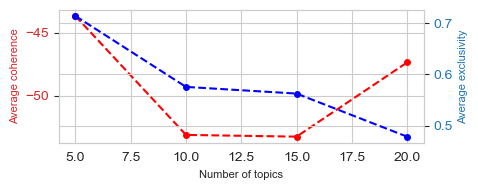

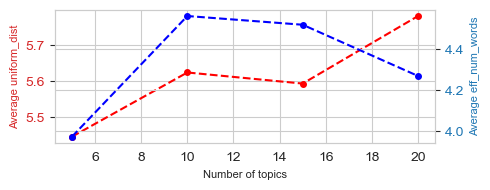

In [15]:
#check cross-validation results to determine the # topics K
tax_level = "sequence"
N_TOPICS = [5, 10, 15, 20]
metric = []
metric_2 = []
for j in N_TOPICS:
    diagnostics = pd.read_xml(str(str('~/coral_data/seq_res') + str('/') + str('diagnostics_') + str(j) + str('.xml')))
    metric.append(np.mean(diagnostics['coherence']))
    metric_2.append(np.mean(diagnostics['exclusivity']))

metric
metric_2

sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(5, 2))

color = 'tab:red'
ax1.set_xlabel('Number of topics', fontsize = 8)
ax1.set_ylabel('Average coherence', color=color, fontsize = 8)  
ax1.plot(N_TOPICS, metric, 'ro--', markersize = 4)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Average exclusivity', color=color, fontsize = 8)  
ax2.plot(N_TOPICS, metric_2, 'bo--', markersize = 4)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 
# plt.savefig('./mallet_res/images/plot_phylum_metric_1.eps', format='eps', bbox_inches='tight')

plt.show();

metric = []
metric_2 = []
for j in N_TOPICS:
    diagnostics = pd.read_xml(str(str('~/coral_data/seq_res') + str('/') + str('diagnostics_') + str(j) + str('.xml')))
    metric.append(np.mean(diagnostics['uniform_dist']))
    metric_2.append(np.mean(diagnostics['eff_num_words']))

metric
metric_2

sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(5, 2))

color = 'tab:red'
ax1.set_xlabel('Number of topics', fontsize = 8)
ax1.set_ylabel('Average uniform_dist', color=color, fontsize = 8)  
ax1.plot(N_TOPICS, metric, 'ro--', markersize = 4)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Average eff_num_words', color=color, fontsize = 8)  
ax2.plot(N_TOPICS, metric_2, 'bo--', markersize = 4)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 
#plt.savefig('./upd_images/coral_metric1.eps', format='eps', bbox_inches='tight')
plt.show();


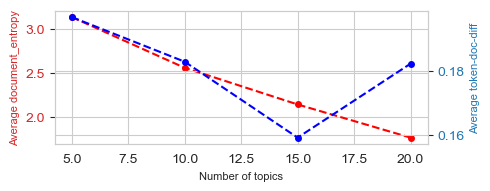

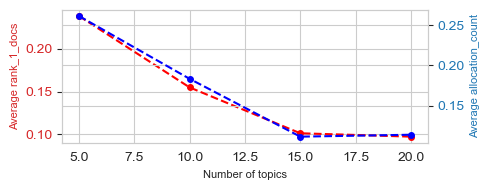

In [17]:
#more metrics
metric = []
metric_2 = []
for j in N_TOPICS:
    diagnostics = pd.read_xml(str(str('~/coral_data/seq_res') + str('/') + str('diagnostics_') + str(j) + str('.xml')))
    metric.append(np.mean(diagnostics['document_entropy']))
    metric_2.append(np.mean(diagnostics['token-doc-diff']))

metric
metric_2

sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(5, 2))

color = 'tab:red'
ax1.set_xlabel('Number of topics', fontsize = 8)
ax1.set_ylabel('Average document_entropy', color=color, fontsize = 8)  
ax1.plot(N_TOPICS, metric, 'ro--', markersize = 4)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Average token-doc-diff', color=color, fontsize = 8)  
ax2.plot(N_TOPICS, metric_2, 'bo--', markersize = 4)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 
plt.show();

metric = []
metric_2 = []
for j in N_TOPICS:
    diagnostics = pd.read_xml(str(str('~/coral_data/seq_res') + str('/') + str('diagnostics_') + str(j) + str('.xml')))
    metric.append(np.mean(diagnostics['rank_1_docs']))
    metric_2.append(np.mean(diagnostics['allocation_count']))

metric
metric_2

sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(5, 2))

color = 'tab:red'
ax1.set_xlabel('Number of topics', fontsize = 8)
ax1.set_ylabel('Average rank_1_docs', color=color, fontsize = 8)  
ax1.plot(N_TOPICS, metric, 'ro--', markersize = 4)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Average allocation_count', color=color, fontsize = 8)  
ax2.plot(N_TOPICS, metric_2, 'bo--', markersize = 4)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 
#plt.savefig('./upd_images/coral_metric2.eps', format='eps', bbox_inches='tight')
plt.show();

In [18]:
#set the number of topics 5, 10, 15, or 20
NTOPICS = 20
topic_names = []
for i in range(NTOPICS):
    topic_names.append('Topic ' + str(i+1))
    
list_taxa = X.columns
df_taxa = pd.DataFrame(list_taxa).T
df_taxa.columns = df_taxa.iloc[0, :]
twd = load_topic_word_distributions('../coral_asv_res_50/topic-word-weights_'+str(NTOPICS)+'.dat')
temp = pd.DataFrame([twd[0]])

df_al = pd.merge(df_taxa.T, temp.T, left_index=True, right_index=True, how='inner').fillna(0)
del df_al['ASV_identifier']
df_al = df_al.T
df_al.reset_index(inplace=True)
del df_al['index']
df_fin = df_al
for k in range(1, len(twd)):
    temp = pd.DataFrame([twd[k]])
    df_al = pd.merge(df_taxa.T, temp.T, left_index=True, right_index=True, how='inner').fillna(0)
    del df_al['ASV_identifier']
    df_al = df_al.T
    df_al.reset_index(inplace=True)
    del df_al['index']
    df_fin = pd.merge(df_fin.T, df_al.T, left_index=True, right_index=True, how='inner').fillna(0) 
    df_fin = df_fin.T
 
    
df_norm = df_fin.T
df_norm.columns = topic_names


df_norm['Taxonomy'] = ''
for i in range(df_norm.shape[0]):
    df_norm.iloc[i, df_norm.columns.get_loc('Taxonomy')] = df_asv_visual.loc[df_asv_visual['ASV_identifier'] == df_norm.index[i], "Taxonomy_visual"].iloc[0]
df_norm.index = df_norm['Taxonomy']
del df_norm['Taxonomy']


            
g = df_norm
g = g[g >= 0.1].fillna(0)
g = g[(g.T != 0).any()]
g.shape
g = g[['Topic 4', 'Topic 15', 'Topic 10', 'Topic 14', 'Topic 5', 'Topic 19', 'Topic 20', 'Topic 9', 'Topic 8', 'Topic 6', 'Topic 3', 'Topic 1', 'Topic 18', 'Topic 11', 'Topic 17', 'Topic 7', 'Topic 12', 'Topic 13', 'Topic 16', 'Topic 2']]
g #show taxa with probs >= 0.1, line above sets the order of topics (for visual purposes only)

(30, 20)

Topic 4  Topic 15  \
Taxonomy                                                                 
Cyanobacteria__Oxyphotobacteria__Phormidesmiale...  0.000000  0.000000   
Cyanobacteria__Oxyphotobacteria__Nostocales__Os...  0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Vibrionale...  0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Oceanospir...  0.000000  0.000000   
Firmicutes__Bacilli__Bacillales__Bacillaceae        0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Francisell...  0.000000  0.000000   
Halanaerobiaeota__Halanaerobiia__Halanaerobiale...  0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Alteromona...  0.000000  0.000000   
Proteobacteria__Alphaproteobacteria__NA__NA         0.000000  0.000000   
Cyanobacteria__Oxyphotobacteria__Nostocales__NA     0.000000  0.000000   
Proteobacteria__NA__NA__NA                          0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Betaproteo...  0.000000  0.000000   
Bacteroidetes__Bacteroidia__Cytophagales__Cyclo...  0.000000  0.000000   
Proteobacteria__Alphaproteobacteria__Rhodobacte...  0.000000  0.000000   
Tenericutes__Mollicutes__NA__NA                     0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Oceanospir...  0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Vibrionale...  0.000000  0.000000   
Spirochaetes__Spirochaetia__Spirochaetales__Spi...  0.000000  0.000000   
Spirochaetes__Spirochaetia__Spirochaetales__Spi...  0.000000  0.000000   
Deinococcus-Thermus__Deinococci__Thermales__The...  0.000000  0.000000   
Actinobacteria__Actinobacteria__Corynebacterial...  0.000000  0.000000   
Proteobacteria__Deltaproteobacteria__Myxococcal...  0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Oceanospir...  0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Vibrionale...  0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Oceanospir...  0.000000  0.000000   
Cyanobacteria__Oxyphotobacteria__Nostocales__No...  0.000000  0.000000   
Epsilonbacteraeota__Campylobacteria__Campylobac...  0.000000  0.000000   
Proteobacteria__Alphaproteobacteria__Rickettsia...  0.790475  0.992931   
Proteobacteria__Gammaproteobacteria__Betaproteo...  0.000000  0.000000   
Cyanobacteria__Oxyphotobacteria__Nostocales__NA     0.000000  0.000000   

                                                    Topic 10  Topic 14  \
Taxonomy                                                                 
Cyanobacteria__Oxyphotobacteria__Phormidesmiale...  0.000000  0.000000   
Cyanobacteria__Oxyphotobacteria__Nostocales__Os...  0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Vibrionale...  0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Oceanospir...  0.000000  0.000000   
Firmicutes__Bacilli__Bacillales__Bacillaceae        0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Francisell...  0.000000  0.000000   
Halanaerobiaeota__Halanaerobiia__Halanaerobiale...  0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Alteromona...  0.000000  0.000000   
Proteobacteria__Alphaproteobacteria__NA__NA         0.000000  0.000000   
Cyanobacteria__Oxyphotobacteria__Nostocales__NA     0.000000  0.000000   
Proteobacteria__NA__NA__NA                          0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Betaproteo...  0.000000  0.000000   
Bacteroidetes__Bacteroidia__Cytophagales__Cyclo...  0.000000  0.000000   
Proteobacteria__Alphaproteobacteria__Rhodobacte...  0.000000  0.000000   
Tenericutes__Mollicutes__NA__NA                     0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Oceanospir...  0.000000  0.000000   
Proteobacteria__Gammaproteobacteria__Vibrionale...  0.000000  0.000000   
Spirochaetes__Spirochaetia__Spirochaetales__Spi...  0.000000  0.000000   
Spirochaetes__Spirochaetia__Spirochaetales__Spi...  0.000000  0.000000   
Deinococcus-Thermus__Deinococci__Thermales__The...  0.000000  0.000000   
Actinobacteria__Actinobacteria__Corynebacterial...  0.00

Original results from LDA


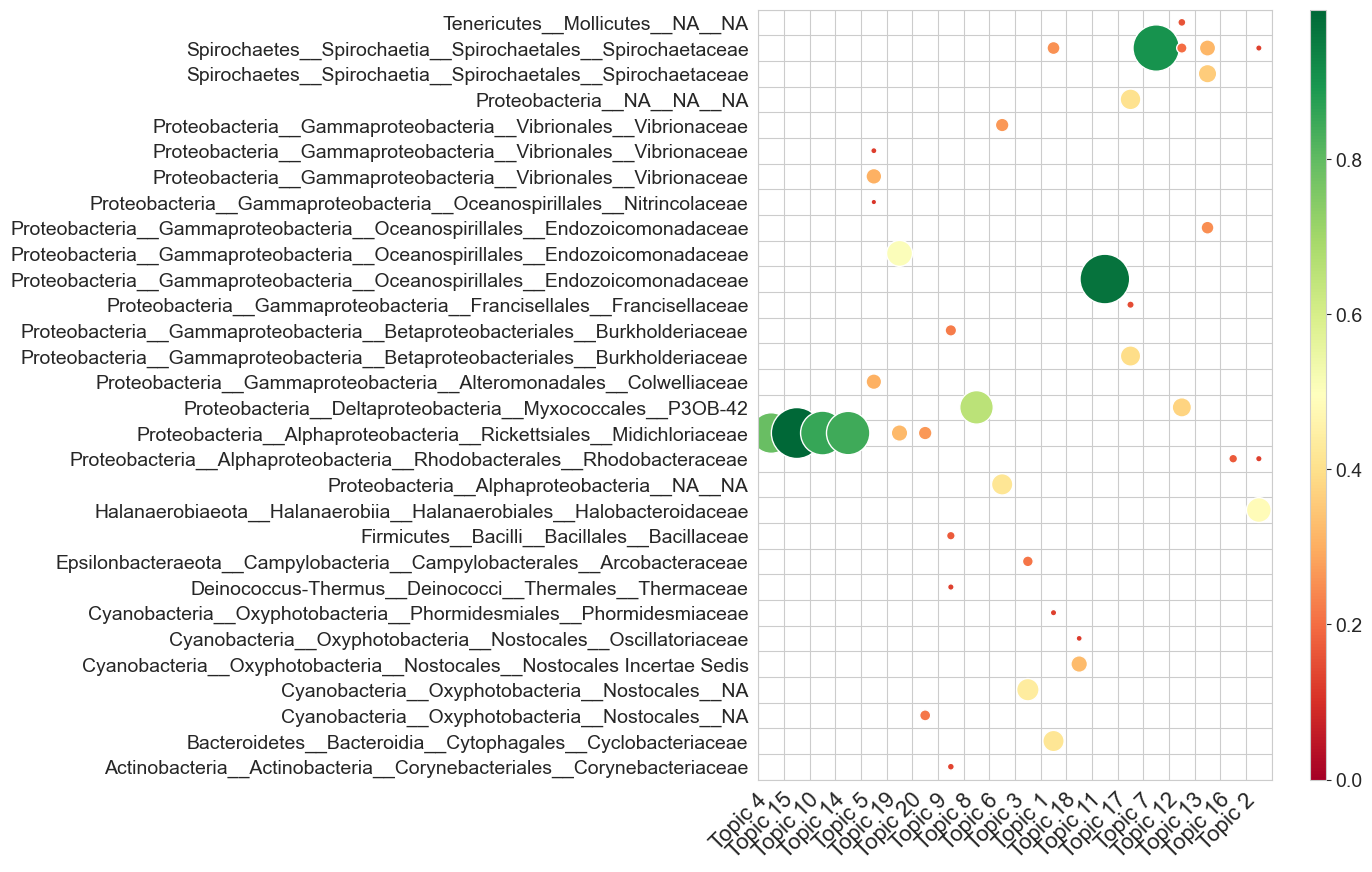

In [19]:
print("Original results from LDA")
g = g.sort_index()

ylabels = g.index
xlabels = g.columns
N = len(ylabels)
M = len(xlabels)

x, y = np.meshgrid(np.arange(M), np.arange(N))
c = np.random.rand(N, M)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,10))

R = g
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(np.array(R).flat, x.flat, y.flat)]
col = PatchCollection(circles, array=np.array(R).flatten(), cmap="RdYlGn")

ax.add_collection(col)
y_order = sorted(ylabels)
ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=y_order)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.set_xticklabels(xlabels, rotation = 45, ha="right", fontsize=16)
ax.set_yticklabels(y_order, fontsize=14)
ax.grid(which='both')
ax.set_aspect("equal", "box")
cbar = plt.colorbar(col, aspect=50)
cbar.ax.tick_params(labelsize=14) 
#plt.savefig('./upd_images/coral_2.eps', format='eps', bbox_inches='tight')
plt.show();



Original results from LDA


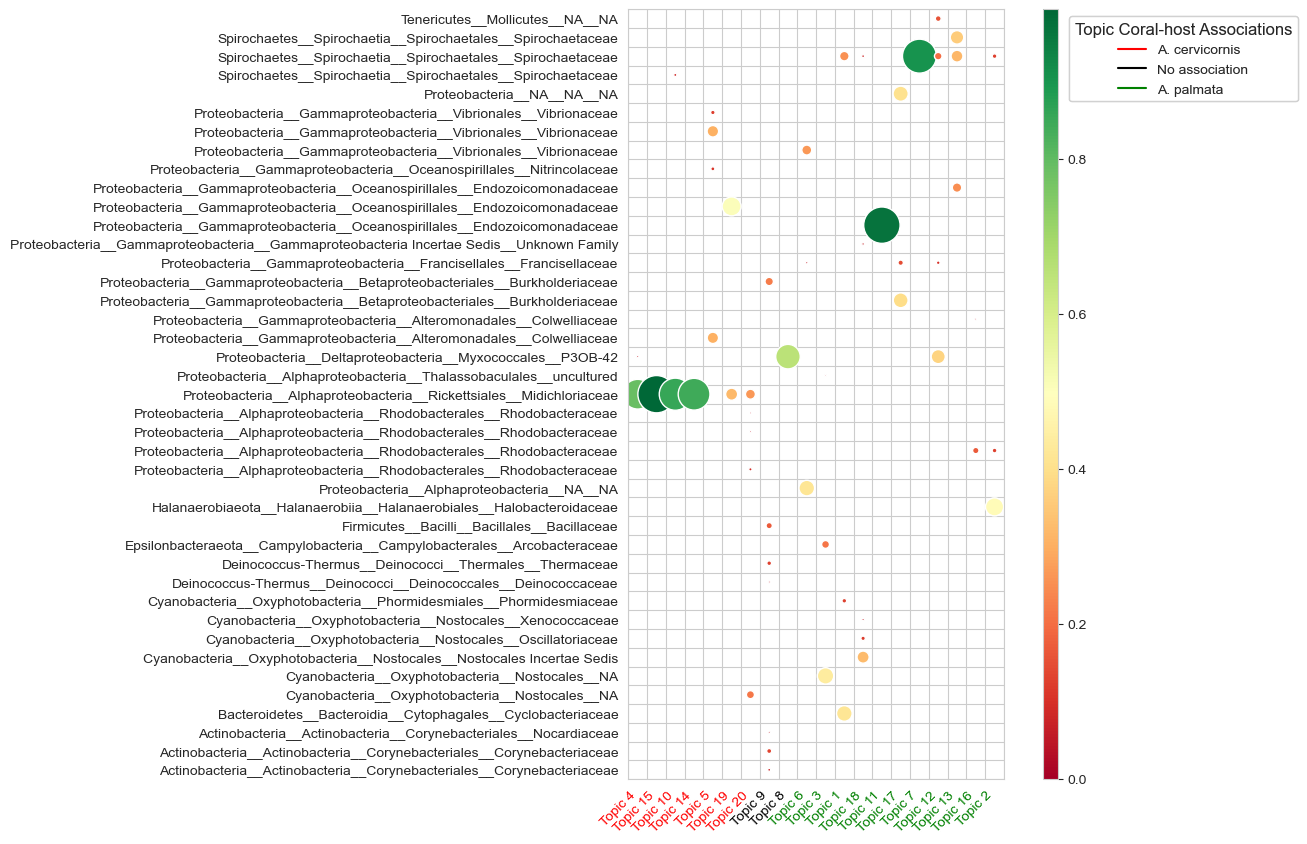

In [20]:
#with legend
from matplotlib.lines import Line2D
g = df_norm
g = g[g >= 0.05].fillna(0)
g = g[(g.T != 0).any()]
g.shape
print("Original results from LDA")
g = g
g = g.sort_index()

g = g[['Topic 4', 'Topic 15', 'Topic 10', 'Topic 14', 'Topic 5', 'Topic 19', 'Topic 20', 'Topic 9', 'Topic 8', 'Topic 6', 'Topic 3', 'Topic 1', 'Topic 18', 'Topic 11', 'Topic 17', 'Topic 7', 'Topic 12', 'Topic 13', 'Topic 16', 'Topic 2']]

ylabels = g.index
xlabels = g.columns
N = len(ylabels)
M = len(xlabels)

x, y = np.meshgrid(np.arange(M), np.arange(N))
c = np.random.rand(N, M)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,10))

R = g
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(np.array(R).flat, x.flat, y.flat)]
col = PatchCollection(circles, array=np.array(R).flatten(), cmap="RdYlGn")
ax.add_collection(col)

y_order = sorted(ylabels)
ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=y_order)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.set_xticklabels(xlabels, rotation = 45, ha="right", fontsize=10)

colors = [['red']*7, ['black']*2, ['green']*11]
colors = [item for sublist in colors for item in sublist]

for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)


ax.set_yticklabels(y_order, fontsize=10)
ax.grid(which='both')
ax.set_aspect("equal", "box")
cbar = plt.colorbar(col, aspect=50)
cbar.ax.tick_params(labelsize=10) 

legend_elements2 = [Line2D([0], [0], color = 'red', label='A. cervicornis',
                          markerfacecolor='black', markersize=10),
                   Line2D([0], [0], color = 'black', label='No association',
                          markerfacecolor='black', markersize=10),
                   Line2D([0], [0], color = 'green', label='A. palmata',
                          markerfacecolor='black', markersize=10)]

leg2 = ax.legend(handles=legend_elements2, loc = 'upper right', fontsize = 10, title_fontsize = 12, bbox_to_anchor = (1.8, 1), ncol = 1, title = 'Topic Coral-host Associations')
ax.add_artist(leg2)
#plt.savefig('./upd_images/coral_species_' + str(tax_level) + '.eps', format='eps', bbox_inches='tight')
plt.show();

In [22]:
NTOPICS = 20
topic_names = []
for i in range(NTOPICS):
    topic_names.append('Topic ' + str(i+1))
    
list_taxa = X.columns
df_taxa = pd.DataFrame(list_taxa).T
df_taxa.columns = df_taxa.iloc[0, :]
twd = load_topic_word_distributions('../coral_asv_res_50/topic-word-weights_'+str(NTOPICS)+'.dat')
temp = pd.DataFrame([twd[0]])

df_al = pd.merge(df_taxa.T, temp.T, left_index=True, right_index=True, how='inner').fillna(0)
del df_al['ASV_identifier']
df_al = df_al.T
df_al.reset_index(inplace=True)
del df_al['index']
df_fin = df_al
for k in range(1, len(twd)):
    temp = pd.DataFrame([twd[k]])
    df_al = pd.merge(df_taxa.T, temp.T, left_index=True, right_index=True, how='inner').fillna(0)
    del df_al['ASV_identifier']
    df_al = df_al.T
    df_al.reset_index(inplace=True)
    del df_al['index']
    df_fin = pd.merge(df_fin.T, df_al.T, left_index=True, right_index=True, how='inner').fillna(0) 
    df_fin = df_fin.T
 
    
df_norm = df_fin.T
df_norm.columns = topic_names

g = df_norm
aa = X.iloc[:, 0:].div(X.iloc[:, 0:].sum(axis=1), axis=0)
df = pd.DataFrame(np.mean(aa.iloc[:, :]))
s = g.T
df = df.T
s = s / df.loc[0]
s = s.T
s = s.div(s.sum())

s['Taxonomy'] = ''
for i in range(s.shape[0]):
    s.iloc[i, s.columns.get_loc('Taxonomy')] = df_abund.loc[df_abund['ASV_identifier'] == s.index[i], "Taxonomy"].iloc[0]
s.index = s['Taxonomy']
del s['Taxonomy']


df_norm['Taxonomy'] = ''
for i in range(df_norm.shape[0]):
    df_norm.iloc[i, df_norm.columns.get_loc('Taxonomy')] = df_abund.loc[df_abund['ASV_identifier'] == df_norm.index[i], "Taxonomy"].iloc[0]
df_norm.index = df_norm['Taxonomy']
del df_norm['Taxonomy']


twd = load_topic_word_distributions('../coral_asv_res_50/topic-word-weights_'+str(NTOPICS)+'.dat')

temp = pd.DataFrame([twd[0]])
for i in range(1, len(twd)):
    temp = pd.concat([temp, pd.DataFrame([twd[i]])])
temp = temp.reset_index()
del temp['index']
mtx_topics = pd.DataFrame(cosine_similarity(temp))
matrix = np.triu(mtx_topics)

matrix[matrix >= 0.7]
print("The # topic pairs that have cosine similarity >= 0.9 is", matrix[matrix >= 0.90].shape[0] - NTOPICS)
for i in range(NTOPICS-1):
    for j in range(i+1, NTOPICS):
        if (matrix[i][j] > 0.9):
            print(i+1, j+1, matrix[i][j])

array([1.        , 1.        , 1.        , 1.        , 0.9915062 ,
       0.99512201, 0.99644192, 0.71619169, 1.        , 1.        ,
       1.        , 1.        , 0.80106406, 1.        , 1.        ,
       0.99398657, 0.99493422, 0.71505591, 1.        , 1.        ,
       1.        , 1.        , 0.99864469, 0.71800106, 1.        ,
       0.71865905, 1.        , 1.        , 1.        , 1.        ,
       1.        ])

The # topic pairs that have cosine similarity >= 0.9 is 6
4 10 0.9915062004249492
4 14 0.995122006266378
4 15 0.9964419247515733
10 14 0.9939865728292117
10 15 0.9949342245431236
14 15 0.9986446907272511


In [53]:
N = 20
top10df = np.round(df_norm.mask(df_norm.rank(axis=0, method='min', ascending=False) > N, 0)*100, 3)
top10df = top10df.loc[~(top10df==0).all(axis=1)]
top10df.to_excel(r'./csv_lda_files/top_20_most_probable_asvs_in_LDA_topics_coraldata.xlsx', header=True, index=True)
print(top10df.to_latex(index=True)) 


N = 20
top10df = np.round(s.mask(s.rank(axis=0, method='min', ascending=False) > N, 0)*100, 3)
top10df = top10df.loc[~(top10df==0).all(axis=1)]
top10df.to_excel(r'./csv_lda_files/top_20_most_relativeamplified_asvs_in_LDA_topics_coraldata.xlsx', header=True, index=True)
print(top10df.to_latex(index=True)) 


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



\begin{tabular}{lrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &  Topic 1 &  Topic 2 &  Topic 3 &  Topic 4 &  Topic 5 &  Topic 6 &  Topic 7 &  Topic 8 &  Topic 9 &  Topic 10 &  Topic 11 &  Topic 12 &  Topic 13 &  Topic 14 &  Topic 15 &  Topic 16 &  Topic 17 &  Topic 18 &  Topic 19 &  Topic 20 \\
Taxonomy                                           &          &          &          &          &          &          &          &          &          &           &           &           &           &           &           &           &           &           &           &           \\
\midrule
d\_\_Bacteria\_p\_\_Proteobacteria\_c\_\_Gammaproteobac... &    0.000 &    0.000 &    0.000 &    0.000 &    0.000 &    0.000 &    0.000 &    0.000 &    0.000 &     0.000 &     0.000 &     0.000 &     0.000 &     1.105 &     0.000 &     0.000 &     0.000 &     0.000 &     0.000 &     0.000 \\
d\_\_Bacteria\_p\_\_Proteobacteria\_c\_\_Gammaproteobac... &    0.000 &    0.000 &    0.000 &    0.000 &    0.000 &    0.000 &  

In [24]:
for i in range(NTOPICS):
    topic_name = 'Topic ' + str(i+1)
    print(topic_name)
    print(df_norm[topic_name].sort_values(ascending = False)[0:30])
    print("----------------------")

Topic 1
Taxonomy
d__Bacteria_p__Bacteroidetes_c__Bacteroidia_o__Cytophagales_f__Cyclobacteriaceae_g__Fulvivirga_s__uncultured-bacterium                                     0.415513
d__Bacteria_p__Spirochaetes_c__Spirochaetia_o__Spirochaetales_f__Spirochaetaceae_g__Spirochaeta-2                                                          0.254077
d__Bacteria_p__Cyanobacteria_c__Oxyphotobacteria_o__Phormidesmiales_f__Phormidesmiaceae                                                                    0.124838
d__Bacteria_p__Proteobacteria_c__Alphaproteobacteria                                                                                                       0.048024
d__Bacteria_p__Proteobacteria                                                                                                                              0.033011
d__Bacteria_p__Proteobacteria_c__Gammaproteobacteria_o__Betaproteobacteriales_f__Burkholderiaceae_g__Cupriavidus                                           0.025032

In [30]:
# sc = s[s >= 0.02].fillna(0)
# sc = sc[(sc.T != 0).any()]
# sc.shape

# print("Relative Amplification results from LDA")
# g = sc

# ylabels = g.index
# xlabels = g.columns
# N = len(ylabels)
# M = len(xlabels)

# x, y = np.meshgrid(np.arange(M), np.arange(N))
# c = np.random.rand(N, M)

# sns.set_style("whitegrid")
# fig, ax = plt.subplots(figsize=(10,10))

# R = g*4
# circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(np.array(R).flat, x.flat, y.flat)]
# col = PatchCollection(circles, array=np.array(R).flatten(), cmap="RdYlGn")

# ax.add_collection(col)
# y_order = sorted(ylabels)
# ax.set(xticks=np.arange(M), yticks=np.arange(N),
#        xticklabels=xlabels, yticklabels=y_order)
# ax.set_xticks(np.arange(M+1)-0.5, minor=True)
# ax.set_yticks(np.arange(N+1)-0.5, minor=True)
# ax.set_xticklabels(xlabels, rotation = 45, ha="right", fontsize=8)
# ax.set_yticklabels(y_order, fontsize=10)
# ax.grid(which='both')
# ax.set_aspect("equal", "box")
# cbar = plt.colorbar(col, aspect=50)
# cbar.ax.tick_params(labelsize=7) 

# plt.show();

In [28]:
df_meta = df_meta.drop(0)
df_selected_meta = df_meta.loc[:, ['SampleID', 'PlateNumber', 'scientific_name', 'Genotype', 'outcome', 'Outcome', 'Susceptibility', 'Treatment', 'Nursery']]
df_selected_meta

SampleID  PlateNumber       scientific_name Genotype  \
1   C18abaseline070217M_S19            1  Acropora_cervicornis      C18   
2   C18cbaseline070217M_S15            1  Acropora_cervicornis      C18   
3     C18cexposed072817M_S8            1  Acropora_cervicornis      C18   
4     C18dexposed072817M_S9            1  Acropora_cervicornis      C18   
5    C18eexposed072817M_S10            1  Acropora_cervicornis      C18   
..                      ...          ...                   ...      ...   
91     P9eexposed071727_S91            1      Acropora_palmata       P9   
92    P9gbaseline062217_S92            1      Acropora_palmata       P9   
93     P9gexposed071717_S93            2      Acropora_palmata       P9   
94    P9ibaseline062217_S94            2      Acropora_palmata       P9   
95    P9iexposed071717_S105            2      Acropora_palmata       P9   

                 outcome          Outcome Susceptibility   Treatment Nursery  
1           Control_C18a          Control            Mid     Control      UM  
2           Control_C18c          Control            Mid     Control      UM  
3   VisuallyHealthy_C18c  VisuallyHealthy            Mid  Inoculated      UM  
4   VisuallyHealthy_C18d  VisuallyHealthy            Mid  Inoculated      UM  
5          Diseased_C18e         Diseased            Mid  Inoculated      UM  
..                   ...              ...            ...         ...     ...  
91   VisuallyHealthy_P9e  VisuallyHealthy           High  Inoculated     CRF  
92           Control_P9g          Control           High     Control     CRF  
93          Diseased_P9g         Diseased           High  Inoculated     CRF  
94           Control_P9i          Control           High     Control     CRF  
95          Diseased_P9i         Diseased           High  Inoculated     CRF  

[95 rows x 9 columns]

In [31]:
doc_topics = pd.read_csv('../coral_asv_res_50/doc-topic_'+str(NTOPICS)+'.dat', sep='\s+', header=None).iloc[:, np.r_[0:NTOPICS+2]]
#doc_topics

i=0
doc_topics.iloc[i, 1]
doc_topics.iloc[i, 1].split('/')[10].split('.')[0]


'file:/vast/home/akim/corn/analysis/data/coral_data/./ASV/C14iexposed071717L_S1.txt'

'C14iexposed071717L_S1'

In [32]:
#topic distribution in documents
#doc_topics = pd.read_csv('../gitlab/data/coral_data/seq_res/doc-topic_'+str(NTOPICS)+'.dat', sep='\s+', header=None).iloc[:, np.r_[0:NTOPICS+2]]
doc_topics = pd.read_csv('../coral_asv_res_50/doc-topic_'+str(NTOPICS)+'.dat', sep='\s+', header=None).iloc[:, np.r_[0:NTOPICS+2]]
temp = []
for i in range(doc_topics.shape[0]):
    temp.append(doc_topics.iloc[i, 1].split('/')[10].split('.')[0])

doc_topics.iloc[:, 1] = temp
doc_topics.columns = ['ID', 'SampleID'] + topic_names
doc_topics
df = doc_topics.merge(df_selected_meta, left_on='SampleID', right_on='SampleID', how = 'left')

ID                 SampleID       Topic 1       Topic 2       Topic 3  \
0    0    C14iexposed071717L_S1  7.818734e-08  5.188253e-08  1.186086e-07   
1    1    C14jexposed071717L_S2  7.818812e-08  5.188305e-08  1.186098e-07   
2    2    C14kexposed071717L_S3  7.818030e-08  5.187787e-08  1.185979e-07   
3    3  C17abaseline070217H_S17  7.818656e-08  5.188202e-08  1.186074e-07   
4    4    C17aexposed072817H_S4  7.818812e-08  5.188305e-08  5.011969e-05   
..  ..                      ...           ...           ...           ...   
90  90     P9eexposed071727_S91  7.818499e-08  9.944718e-01  1.186050e-07   
91  91    P9gbaseline062217_S92  7.818734e-08  5.188253e-08  1.186086e-07   
92  92     P9gexposed071717_S93  7.818812e-08  5.188305e-08  1.186098e-07   
93  93    P9ibaseline062217_S94  7.818656e-08  5.188202e-08  1.186074e-07   
94  94                 neg_S106  7.818656e-08  5.188202e-08  1.186074e-07   

         Topic 4       Topic 5       Topic 6       Topic 7       Topic 8  ...  \
0   3.167435e-08  1.710354e-03  1.700504e-03  9.735495e-07  2.060845e-05  ...   
1   3.167467e-08  2.703398e-04  1.171074e-02  8.109911e-04  6.082211e-07  ...   
2   3.167150e-08  2.303159e-04  2.680274e-03  7.109178e-04  1.790468e-03  ...   
3   3.167403e-08  3.339992e-07  8.048453e-05  5.909745e-04  6.082090e-07  ...   
4   3.167467e-08  3.340059e-07  4.844117e-07  2.609792e-04  6.082211e-07  ...   
..           ...           ...           ...           ...           ...  ...   
90  3.167340e-08  3.339925e-07  1.048421e-05  9.735203e-07  6.081968e-07  ...   
91  3.167435e-08  3.340025e-07  1.564067e-02  3.097390e-05  6.082151e-07  ...   
92  3.167467e-08  3.340059e-07  7.115202e-02  8.369591e-01  2.811122e-02  ...   
93  3.167403e-08  3.339992e-07  4.844020e-07  7.181021e-01  3.920615e-03  ...   
94  3.167403e-08  3.339992e-07  4.844020e-07  9.735398e-07  6.082090e-07  ...   

    Topic 11      Topic 12      Topic 13      Topic 14  Topic 15  \
0   0.000271  2.001505e-07  1.026012e-07  3.487879e-07  0.004682   
1   0.000001  2.001525e-07  1.026022e-07  3.487914e-07  0.986634   
2   0.000501  8.019386e-05  1.025919e-07  3.487565e-07  0.993754   
3   0.013231  2.001485e-07  1.026001e-07  3.487844e-07  0.899544   
4   0.000001  2.001525e-07  1.026022e-07  3.487914e-07  0.909112   
..       ...           ...           ...           ...       ...   
90  0.000521  2.001445e-07  1.025981e-07  3.487775e-07  0.004992   
91  0.542678  4.082649e-01  1.026012e-07  3.487879e-07  0.006052   
92  0.000051  2.001525e-07  1.026022e-07  3.050415e-03  0.000002   
93  0.000621  2.001485e-07  1.026001e-07  3.487844e-07  0.005062   
94  0.001131  2.001485e-07  1.026001e-07  3.487844e-07  0.000972   

        Topic 16      Topic 17      Topic 18      Topic 19      Topic 20  
0   8.714706e-08  4.725685e-07  5.908529e-08  3.178314e-07  9.916116e-01  
1   8.714793e-08  3.104793e-04  5.908588e-08  2.603235e-04  5.363942e-08  
2   1.000793e-04  4.725260e-07  5.907997e-08  1.503060e-04  5.363405e-08  
3   8.714619e-08  4.725638e-07  5.908470e-08  8.655046e-02  5.363835e-08  
4   8.714793e-08  4.725733e-07  5.908588e-08  9.057228e-02  5.363942e-08  
..           ...           ...           ...           ...           ...  
90  8.714444e-08  4.725544e-07  5.908351e-08  3.178219e-07  5.363727e-08  
91  8.714706e-08  2.733079e-02  5.908529e-08  3.178314e-07  5.363888e-08  
92  8.714793e-08  5.981177e-02  5.908588e-08  3.503254e-04  5.363942e-08  
93  8.714619e-08  2.722909e-01  5.908470e-08  3.178282e-07  5.363835e-08  
94  8.714619e-08  4.725638e-07  5.908470e-08  3.178282e-07  5.363835e-08  

[95 rows x 22 columns]

In [33]:
df
pd.Categorical(df['PlateNumber']).categories
pd.Categorical(df['scientific_name']).categories
pd.Categorical(df['Genotype']).categories
pd.Categorical(df['outcome']).categories
pd.Categorical(df['Outcome']).categories
pd.Categorical(df['Susceptibility']).categories
pd.Categorical(df['Treatment']).categories
pd.Categorical(df['Nursery']).categories

ID                 SampleID       Topic 1       Topic 2       Topic 3  \
0    0    C14iexposed071717L_S1  7.818734e-08  5.188253e-08  1.186086e-07   
1    1    C14jexposed071717L_S2  7.818812e-08  5.188305e-08  1.186098e-07   
2    2    C14kexposed071717L_S3  7.818030e-08  5.187787e-08  1.185979e-07   
3    3  C17abaseline070217H_S17  7.818656e-08  5.188202e-08  1.186074e-07   
4    4    C17aexposed072817H_S4  7.818812e-08  5.188305e-08  5.011969e-05   
..  ..                      ...           ...           ...           ...   
90  90     P9eexposed071727_S91  7.818499e-08  9.944718e-01  1.186050e-07   
91  91    P9gbaseline062217_S92  7.818734e-08  5.188253e-08  1.186086e-07   
92  92     P9gexposed071717_S93  7.818812e-08  5.188305e-08  1.186098e-07   
93  93    P9ibaseline062217_S94  7.818656e-08  5.188202e-08  1.186074e-07   
94  94                 neg_S106  7.818656e-08  5.188202e-08  1.186074e-07   

         Topic 4       Topic 5       Topic 6       Topic 7       Topic 8  ...  \
0   3.167435e-08  1.710354e-03  1.700504e-03  9.735495e-07  2.060845e-05  ...   
1   3.167467e-08  2.703398e-04  1.171074e-02  8.109911e-04  6.082211e-07  ...   
2   3.167150e-08  2.303159e-04  2.680274e-03  7.109178e-04  1.790468e-03  ...   
3   3.167403e-08  3.339992e-07  8.048453e-05  5.909745e-04  6.082090e-07  ...   
4   3.167467e-08  3.340059e-07  4.844117e-07  2.609792e-04  6.082211e-07  ...   
..           ...           ...           ...           ...           ...  ...   
90  3.167340e-08  3.339925e-07  1.048421e-05  9.735203e-07  6.081968e-07  ...   
91  3.167435e-08  3.340025e-07  1.564067e-02  3.097390e-05  6.082151e-07  ...   
92  3.167467e-08  3.340059e-07  7.115202e-02  8.369591e-01  2.811122e-02  ...   
93  3.167403e-08  3.339992e-07  4.844020e-07  7.181021e-01  3.920615e-03  ...   
94  3.167403e-08  3.339992e-07  4.844020e-07  9.735398e-07  6.082090e-07  ...   

        Topic 19      Topic 20  PlateNumber       scientific_name  Genotype  \
0   3.178314e-07  9.916116e-01          1.0  Acropora_cervicornis       C14   
1   2.603235e-04  5.363942e-08          1.0  Acropora_cervicornis       C14   
2   1.503060e-04  5.363405e-08          1.0  Acropora_cervicornis       C14   
3   8.655046e-02  5.363835e-08          1.0  Acropora_cervicornis       C17   
4   9.057228e-02  5.363942e-08          1.0  Acropora_cervicornis       C17   
..           ...           ...          ...                   ...       ...   
90  3.178219e-07  5.363727e-08          1.0      Acropora_palmata        P9   
91  3.178314e-07  5.363888e-08          1.0      Acropora_palmata        P9   
92  3.503254e-04  5.363942e-08          2.0      Acropora_palmata        P9   
93  3.178282e-07  5.363835e-08          2.0      Acropora_palmata        P9   
94  3.178282e-07  5.363835e-08          NaN                   NaN       NaN   

                outcome          Outcome  Susceptibility   Treatment  Nursery  
0         Diseased_C14i         Diseased             Low  Inoculated      FWC  
1         Diseased_C14j         Diseased             Low  Inoculated      FWC  
2         Diseased_C14k         Diseased             Low  Inoculated      FWC  
3          Control_C17a          Control            High     Control       UM  
4         Diseased_C17a         Diseased            High  Inoculated       UM  
..                  ...              ...             ...         ...      ...  
90  VisuallyHealthy_P9e  VisuallyHealthy            High  Inoculated      CRF  
91          Control_P9g          Control            High     Control      CRF  
92         Diseased_P9g         Diseased            High  Inoculated      CRF  
93          Control_P9i          Control            High     Control      CRF  
94                  NaN              NaN             NaN         NaN      NaN  

[95 rows x 30 columns]

Float64Index([1.0, 2.0], dtype='float64')

Index(['Acropora_cervicornis', 'Acropora_palmata'], dtype='object')

Index(['C14', 'C17', 'C18', 'C20', 'C21', 'C22', 'C24', 'C28', 'C29', 'C30',
       'P10', 'P11', 'P12', 'P7', 'P8', 'P9'],
      dtype='object')

Index(['Control_C17a', 'Control_C17d', 'Control_C18a', 'Control_C18c',
       'Control_C20a', 'Control_C20b', 'Control_C20d', 'Control_C21a',
       'Control_C21c', 'Control_C21d', 'Control_C22a', 'Control_C22e',
       'Control_C24c', 'Control_C24d', 'Control_C28c', 'Control_C28f',
       'Control_C28i', 'Control_C29b', 'Control_C29e', 'Control_C29h',
       'Control_C30g', 'Control_C30i', 'Control_C30j', 'Control_P10d',
       'Control_P10e', 'Control_P10i', 'Control_P11b', 'Control_P11h',
       'Control_P12f', 'Control_P12g', 'Control_P12i', 'Control_P7c',
       'Control_P7h', 'Control_P7i', 'Control_P8b', 'Control_P8d',
       'Control_P8g', 'Control_P9e', 'Control_P9g', 'Control_P9i',
       'Diseased_C14i', 'Diseased_C14j', 'Diseased_C14k', 'Diseased_C17a',
       'Diseased_C17b', 'Diseased_C17c', 'Diseased_C17e', 'Diseased_C18e',
       'Diseased_C20c', 'Diseased_C20e', 'Diseased_C21c', 'Diseased_C22c',
       'Diseased_C22e', 'Diseased_C24e', 'Diseased_C28b', 'Diseased_C28c',

Index(['Control', 'Diseased', 'VisuallyHealthy'], dtype='object')

Index(['High', 'Low', 'Mid'], dtype='object')

Index(['Control', 'Inoculated'], dtype='object')

Index(['CRF', 'FWC', 'UM'], dtype='object')

In [35]:
# genotype_p7 = df[df['Genotype'] == 'P7']
# genotype_p7.iloc[:, np.r_[2:NTOPICS+2]].mean(axis=0).sort_values(ascending = False).plot.bar(stacked=False)
# #11,17,6,8,

# genotype_p172122 = df[df['Genotype'].isin(['C17', 'C21', 'C22'])]
# genotype_p172122.iloc[:, np.r_[2:NTOPICS+2]].mean(axis=0).sort_values(ascending = False).plot.bar(stacked=False)
# #15 4 20 6 19

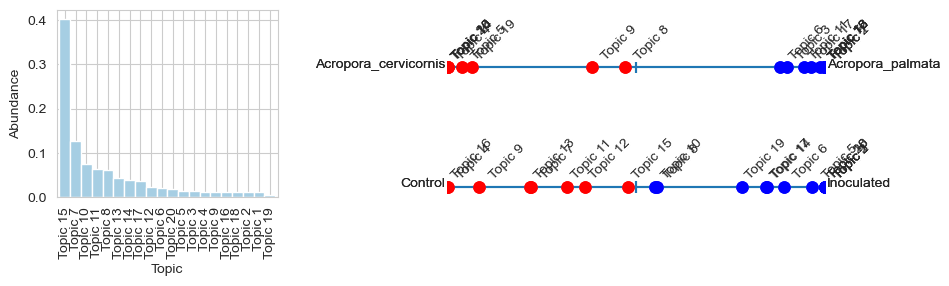

In [36]:
#topic weightings abundances
potsvstopics = df.iloc[:, np.r_[2:NTOPICS+2, NTOPICS+3]]
fig = plt.figure()
ax3 = plt.subplot2grid((10, 10), (0, 0),colspan=3, rowspan=8)
test = potsvstopics
test = pd.DataFrame(test.mean(axis=0))
test.columns = ['Topic']
test = test.sort_values('Topic',ascending=False)
test = test.plot.bar(stacked=False, width = 1, ax=ax3, color=plt.cm.Paired(np.arange(len(df.T))), rot=90, legend=False)
plt.xlabel('Topic')
plt.ylabel('Abundance') 
    
    
ax1 = plt.subplot2grid((10, 10), (0, 5), colspan=5, rowspan=5)

w0 = potsvstopics[potsvstopics['scientific_name'] == 'Acropora_cervicornis']
del w0['scientific_name']
w1 = potsvstopics[potsvstopics['scientific_name'] == 'Acropora_palmata']
del w1['scientific_name']

wt_df = pd.concat([pd.DataFrame(w0.sum(axis = 0)/np.sum(w0.sum(axis = 0))), pd.DataFrame(w1.sum(axis = 0)/np.sum(w1.sum(axis = 0)))], axis = 1)
wt_df.columns = ['Acropora_cervicornis', 'Acropora_palmata']

w_h = []
w_f = []
w_hi = []
w_fi = []
for i in range(wt_df.shape[0]):
    if ((wt_df['Acropora_cervicornis'][i] - wt_df['Acropora_palmata'][i]) < 1e-10):
        w_f.append(1 - wt_df['Acropora_cervicornis'][i]/wt_df['Acropora_palmata'][i])
        w_fi.append(wt_df.index[i])
    else:
        w_h.append(wt_df['Acropora_palmata'][i]/wt_df['Acropora_cervicornis'][i] - 1)
        w_hi.append(wt_df.index[i])

        
ax1.set_xlim(-10,10)
ax1.set_ylim(0,10)

xmin = -10
xmax = 10
y = 5
height = 1

ax1.hlines(y, xmin, xmax)
ax1.vlines(xmin, y - height / 2., y + height / 2.)
ax1.vlines(xmax, y - height / 2., y + height / 2.)

ax1.vlines(0, y - height / 2., y + height / 2.)
for i in range(len(w_h)):
    ax1.plot(w_h[i]*10, y, 'ro', ms = 8, mfc = 'r')
for i in range(len(w_f)):
    ax1.plot(w_f[i]*10, y, 'bo', ms = 8, mfc = 'b')


for i in range(len(w_hi)):
    ax1.annotate(w_hi[i], (w_h[i]*10,y), xytext = (w_h[i]*10 + 2.5, y + 0.7),  
              rotation = 45, ha="right")


for i in range(len(w_fi)):   
    ax1.annotate(w_fi[i], (w_f[i]*10,y), xytext = (w_f[i]*10 + 2.5, y + 0.7),  
                  rotation = 45, ha="right")
    
    
ax1.text(xmin - 0.1, y, 'Acropora_cervicornis', horizontalalignment='right')
ax1.text(xmax + 0.1, y, 'Acropora_palmata', horizontalalignment='left')
ax1.axis('off')      
        
ax1.set_xlim(-10,10)
ax1.set_ylim(0,10)

xmin = -10
xmax = 10
y = 5
height = 1

ax1.hlines(y, xmin, xmax)
ax1.vlines(xmin, y - height / 2., y + height / 2.)
ax1.vlines(xmax, y - height / 2., y + height / 2.)

ax1.vlines(0, y - height / 2., y + height / 2.)
for i in range(len(w_h)):
    ax1.plot(w_h[i]*10, y, 'ro', ms = 8, mfc = 'r')
for i in range(len(w_f)):
    ax1.plot(w_f[i]*10, y, 'bo', ms = 8, mfc = 'b')



ax1.text(xmin - 0.1, y, 'Acropora_cervicornis', horizontalalignment='right')
ax1.text(xmax + 0.1, y, 'Acropora_palmata', horizontalalignment='left')
ax1.axis('off')



ax2 = plt.subplot2grid((10, 10), (5, 5), colspan=5, rowspan=5)
potsvstopics = df.iloc[:, np.r_[2:NTOPICS+2, NTOPICS+8]]

w0 = potsvstopics[potsvstopics['Treatment'] == 'Control']
del w0['Treatment']
w1 = potsvstopics[potsvstopics['Treatment'] == 'Inoculated']
del w1['Treatment']

wt_df = pd.concat([pd.DataFrame(w0.sum(axis = 0)/np.sum(w0.sum(axis = 0))), pd.DataFrame(w1.sum(axis = 0)/np.sum(w1.sum(axis = 0)))], axis = 1)
wt_df.columns = ['Control', 'Inoculated']

t = wt_df.T
t = t.div(t.sum())
wt_df = t.T



tw_h = []
tw_f = []
tw_hi = []
tw_fi = []
for i in range(wt_df.shape[0]):
    if ((wt_df['Control'][i] - wt_df['Inoculated'][i]) < 1e-10):
        tw_f.append(1 - wt_df['Control'][i]/wt_df['Inoculated'][i])
        tw_fi.append(wt_df.index[i])
    else:
        tw_h.append(wt_df['Inoculated'][i]/wt_df['Control'][i] - 1)
        tw_hi.append(wt_df.index[i])

        
ax2.set_xlim(-10,10)
ax2.set_ylim(0,10)

xmin = -10
xmax = 10
y = 5
height = 1

ax2.hlines(y, xmin, xmax)
ax2.vlines(xmin, y - height / 2., y + height / 2.)
ax2.vlines(xmax, y - height / 2., y + height / 2.)

ax2.vlines(0, y - height / 2., y + height / 2.)
for i in range(len(tw_h)):
    ax2.plot(tw_h[i]*10, y, 'ro', ms = 8, mfc = 'r')
for i in range(len(tw_f)):
    ax2.plot(tw_f[i]*10, y, 'bo', ms = 8, mfc = 'b')


for i in range(len(tw_hi)):
    ax2.annotate(tw_hi[i], (tw_h[i]*10,y), xytext = (tw_h[i]*10 + 2.5, y + 0.7),  
              rotation = 45, ha="right")


for i in range(len(tw_fi)):   
    ax2.annotate(tw_fi[i], (tw_f[i]*10,y), xytext = (tw_f[i]*10 + 2.5, y + 0.7),  
                  rotation = 45, ha="right")
    
    
ax2.text(xmin - 0.1, y, 'Control', horizontalalignment='right')
ax2.text(xmax + 0.1, y, 'Inoculated', horizontalalignment='left')
ax2.axis('off')      
        
ax2.set_xlim(-10,10)
ax2.set_ylim(0,10)

xmin = -10
xmax = 10
y = 5
height = 1

ax2.hlines(y, xmin, xmax)
ax2.vlines(xmin, y - height / 2., y + height / 2.)
ax2.vlines(xmax, y - height / 2., y + height / 2.)

ax2.vlines(0, y - height / 2., y + height / 2.)
for i in range(len(tw_h)):
    ax2.plot(tw_h[i]*10, y, 'ro', ms = 8, mfc = 'r')
for i in range(len(tw_f)):
    ax2.plot(tw_f[i]*10, y, 'bo', ms = 8, mfc = 'b')



ax2.text(xmin - 0.1, y, 'Control', horizontalalignment='right')
ax2.text(xmax + 0.1, y, 'Inoculated', horizontalalignment='left')
ax2.axis('off')

fig.tight_layout()
plt.subplots_adjust(top=0.6, left=-0.3)
plt.show();


In [37]:
print('cont')
tw_hi 
tw_h 
print('inoc') 
tw_fi
tw_f 

cont


['Topic 4',
 'Topic 7',
 'Topic 9',
 'Topic 11',
 'Topic 12',
 'Topic 13',
 'Topic 15',
 'Topic 16']

[-0.9999988648143371,
 -0.5575431746177788,
 -0.828770534895761,
 -0.3674453452127554,
 -0.26933392050511706,
 -0.5592458025675516,
 -0.03947963503683216,
 -0.9961685764302375]

inoc


['Topic 1',
 'Topic 2',
 'Topic 3',
 'Topic 5',
 'Topic 6',
 'Topic 8',
 'Topic 10',
 'Topic 14',
 'Topic 17',
 'Topic 18',
 'Topic 19',
 'Topic 20']

[0.9995341435424275,
 0.9997392732882263,
 0.9997769778146517,
 0.9354049087226781,
 0.7823843994791576,
 0.1020524167457626,
 0.1142440470437791,
 0.6942526698690838,
 0.6896734331037037,
 0.9998884800237507,
 0.5608527111763355,
 0.9996275157726008]

In [38]:
print('cervicornia')
w_hi
w_h 
print('palmata') 
w_fi
w_f 

cervicornia


['Topic 4',
 'Topic 5',
 'Topic 8',
 'Topic 9',
 'Topic 10',
 'Topic 14',
 'Topic 15',
 'Topic 19',
 'Topic 20']

[-0.9999982972007804,
 -0.9227696898558209,
 -0.060375774424990425,
 -0.23213555198115665,
 -0.9999958137557465,
 -0.9935955795310634,
 -0.9960835180554538,
 -0.8698691236269843,
 -0.9995134245218759]

palmata


['Topic 1',
 'Topic 2',
 'Topic 3',
 'Topic 6',
 'Topic 7',
 'Topic 11',
 'Topic 12',
 'Topic 13',
 'Topic 16',
 'Topic 17',
 'Topic 18']

[0.9997921585002134,
 0.9999355580144812,
 0.8022744541255242,
 0.7626911598574799,
 0.976954348593726,
 0.8918284724950064,
 0.9993621022536247,
 0.9999487788366394,
 0.996444989887116,
 0.9258962315050401,
 0.9997762516171665]

In [39]:
potsvstopics = df.iloc[:, np.r_[2:NTOPICS+2,NTOPICS+3]]

w0 = potsvstopics[potsvstopics['scientific_name'] == 'Acropora_cervicornis']
del w0['scientific_name']
w1 = potsvstopics[potsvstopics['scientific_name'] == 'Acropora_palmata']
del w1['scientific_name']
sp_df = pd.concat([pd.DataFrame(w0.sum(axis = 0)/np.sum(w0.sum(axis = 0))), pd.DataFrame(w1.sum(axis = 0)/np.sum(w1.sum(axis = 0)))], axis = 1)
sp_df.columns = ['Acropora_cervicornis', 'Acropora_palmata']
sp_df

w_h = []
w_f = []
w_hi = []
w_fi = []
for i in range(sp_df.shape[0]):
    if ((sp_df['Acropora_cervicornis'][i] - sp_df['Acropora_palmata'][i]) < 1e-10):
        w_f.append(1 - sp_df['Acropora_cervicornis'][i]/sp_df['Acropora_palmata'][i])
        w_fi.append(sp_df.index[i])
    else:
        w_h.append(sp_df['Acropora_palmata'][i]/sp_df['Acropora_cervicornis'][i] - 1)
        w_hi.append(sp_df.index[i])

    
    
potsvstopics = df.iloc[:, np.r_[2:NTOPICS+2, NTOPICS+8]]
w0 = potsvstopics[potsvstopics['Treatment'] == 'Control']
del w0['Treatment']
w1 = potsvstopics[potsvstopics['Treatment'] == 'Inoculated']
del w1['Treatment']

w0
w1


tr_df = pd.concat([pd.DataFrame(w0.sum(axis = 0)/np.sum(w0.sum(axis = 0))), pd.DataFrame(w1.sum(axis = 0)/np.sum(w1.sum(axis = 0)))], axis = 1)
tr_df.columns = ['Control', 'Inoculated']
tr_df

tw_h = []
tw_f = []
tw_hi = []
tw_fi = []
for i in range(tr_df.shape[0]):
    if ((tr_df['Control'][i] - tr_df['Inoculated'][i]) < 1e-10):
        tw_f.append(1 - tr_df['Control'][i]/tr_df['Inoculated'][i])
        tw_fi.append(tr_df.index[i])
    else:
        tw_h.append(tr_df['Inoculated'][i]/tr_df['Control'][i] - 1)
        tw_hi.append(tr_df.index[i])


Acropora_cervicornis  Acropora_palmata
Topic 1               0.000006      2.924396e-02
Topic 2               0.000002      2.925481e-02
Topic 3               0.005344      2.702720e-02
Topic 4               0.018601      3.167406e-08
Topic 5               0.020318      1.569185e-03
Topic 6               0.009198      3.876138e-02
Topic 7               0.007814      3.390554e-01
Topic 8               0.062381      5.861484e-02
Topic 9               0.000287      2.207433e-04
Topic 10              0.119706      5.011181e-07
Topic 11              0.015880      1.468065e-01
Topic 12              0.000039      6.118932e-02
Topic 13              0.000006      1.191417e-01
Topic 14              0.060681      3.886263e-04
Topic 15              0.637851      2.498131e-03
Topic 16              0.000104      2.927841e-02
Topic 17              0.006427      8.673259e-02
Topic 18              0.000007      2.931422e-02
Topic 19              0.006828      8.885450e-04
Topic 20              0.028519      1.387664e-05

Topic 1       Topic 2       Topic 3       Topic 4       Topic 5  \
3   7.818656e-08  5.188202e-08  1.186074e-07  3.167403e-08  3.339992e-07   
7   7.817561e-08  5.187475e-08  1.185908e-07  3.166960e-08  1.303160e-04   
9   7.818656e-08  5.188202e-08  1.186074e-07  3.167403e-08  3.339992e-07   
10  7.818890e-08  5.188357e-08  5.012019e-05  3.167498e-08  3.340092e-07   
14  7.818890e-08  5.188357e-08  1.186109e-07  3.167498e-08  3.340092e-07   
15  7.818656e-08  5.188202e-08  1.186074e-07  3.167403e-08  3.560340e-03   
18  7.818734e-08  5.188253e-08  3.011896e-05  1.560050e-03  3.340025e-07   
21  7.818421e-08  5.188046e-08  1.186038e-07  1.145668e-01  3.339892e-07   
22  9.007563e-05  5.188046e-08  3.011775e-05  3.167308e-08  3.339892e-07   
24  7.819281e-08  5.188617e-08  1.186169e-07  3.167657e-08  3.340259e-07   
25  7.818265e-08  5.187942e-08  1.186015e-07  3.167245e-08  4.303132e-04   
27  7.819672e-08  5.188876e-08  1.186228e-07  9.999416e-01  3.340426e-07   
31  7.818734e-08  5.188253e-08  4.011907e-05  3.167435e-08  3.340025e-07   
32  7.818499e-08  5.188098e-08  1.186050e-07  3.167340e-08  3.339925e-07   
36  7.818343e-08  5.187994e-08  5.011668e-05  3.167276e-08  3.339858e-07   
38  7.818578e-08  5.188150e-08  1.186062e-07  3.167371e-08  6.460280e-03   
40  4.007705e-05  5.188046e-08  1.186038e-07  3.167308e-08  3.339892e-07   
43  7.818343e-08  5.187994e-08  1.186026e-07  3.167276e-08  7.033130e-05   
46  7.818578e-08  5.188150e-08  1.186062e-07  3.167371e-08  3.339958e-07   
49  7.818656e-08  5.188202e-08  1.186074e-07  3.167403e-08  6.033410e-05   
54  6.007768e-05  5.188150e-08  1.186062e-07  3.167371e-08  3.339958e-07   
57  7.818656e-08  5.188202e-08  1.186074e-07  3.167403e-08  3.339992e-07   
58  7.818734e-08  5.188253e-08  1.186086e-07  3.167435e-08  3.340025e-07   
60  7.818812e-08  5.188305e-08  1.186098e-07  3.167467e-08  3.340059e-07   
62  7.818890e-08  5.188357e-08  1.186109e-07  3.167498e-08  3.340092e-07   
65  7.819829e-08  5.188980e-08  1.186252e-07  3.167878e-08  3.340493e-07   
66  7.819125e-08  1.500611e-04  1.186145e-07  3.167593e-08  3.340192e-07   
69  7.818734e-08  5.188253e-08  1.186086e-07  3.167435e-08  9.603452e-04   
71  7.818578e-08  5.188150e-08  1.186062e-07  3.167371e-08  2.935009e-02   
73  7.819281e-08  5.188617e-08  1.186169e-07  3.167657e-08  3.340259e-07   
75  7.818343e-08  5.187994e-08  1.186026e-07  3.167276e-08  3.339858e-07   
77  7.817327e-08  5.187320e-08  1.185872e-07  3.166865e-08  3.339424e-07   
79  1.500724e-04  5.187994e-08  1.186026e-07  3.167276e-08  1.003301e-04   
81  7.818030e-08  5.187787e-08  1.185979e-07  3.167150e-08  3.339725e-07   
83  7.818421e-08  5.188046e-08  1.186038e-07  3.167308e-08  3.339892e-07   
85  7.821080e-08  5.189810e-08  1.186442e-07  3.168385e-08  3.121307e-03   
87  7.818734e-08  4.005235e-05  1.186086e-07  3.167435e-08  1.385049e-02   
89  7.819047e-08  5.188461e-08  1.186133e-07  3.167562e-08  3.340159e-07   
91  7.818734e-08  5.188253e-08  1.186086e-07  3.167435e-08  3.340025e-07   
93  7.818656e-08  5.188202e-08  1.186074e-07  3.167403e-08  3.339992e-07   

         Topic 6       Topic 7       Topic 8       Topic 9      Topic 10  \
3   8.048453e-05  5.909745e-04  6.082090e-07  1.426091e-07  2.069968e-07   
7   4.843342e-07  5.908918e-04  6.081238e-07  1.425891e-07  2.069679e-07   
9   1.170486e-03  6.009745e-04  3.581067e-02  1.426091e-07  2.069968e-07   
10  2.304917e-04  6.709948e-04  7.930859e-03  1.426133e-07  2.070030e-07   
14  6.105037e-04  5.909922e-04  3.930732e-03  1.426133e-07  2.070030e-07   
15  2.132052e-02  4.450981e-03  8.883220e-01  1.361016e-02  2.069968e-07   
18  5.304906e-04  7.909827e-04  2.139086e-02  1.426105e-07  2.069989e-07   
21  7.504631e-04  4.809599e-04  4.630477e-03  1.426048e-07  2.069906e-07   
22  1.404804e-04  5.609576e-04  1.460567e-03  3.014175e-05  2.069906e-07   
24  7.049015e-05  7.310332e-04  9.706874e-04  9.014997e-05  2.070134e-07   
25  4.843778e-07  1.180916e-03  1.010559e-03  1.426019e-

Topic 1       Topic 2       Topic 3       Topic 4       Topic 5  \
0   7.818734e-08  5.188253e-08  1.186086e-07  3.167435e-08  1.710354e-03   
1   7.818812e-08  5.188305e-08  1.186098e-07  3.167467e-08  2.703398e-04   
2   7.818030e-08  5.187787e-08  1.185979e-07  3.167150e-08  2.303159e-04   
4   7.818812e-08  5.188305e-08  5.011969e-05  3.167467e-08  3.340059e-07   
5   7.819125e-08  5.188513e-08  1.186145e-07  3.167593e-08  3.340192e-07   
6   7.818734e-08  5.188253e-08  1.186086e-07  3.167435e-08  3.340025e-07   
8   9.007653e-05  3.005133e-05  1.186050e-07  3.167340e-08  1.503312e-04   
11  7.818499e-08  1.005170e-05  1.186050e-07  3.167340e-08  7.033271e-05   
12  3.007854e-05  5.188253e-08  1.186086e-07  3.167435e-08  3.340025e-07   
13  7.818499e-08  5.188098e-08  1.186050e-07  3.167340e-08  8.492147e-01   
16  7.818812e-08  6.005318e-05  1.186098e-07  3.167467e-08  9.290234e-02   
17  7.818421e-08  5.188046e-08  3.182611e-01  3.167308e-08  4.406908e-02   
19  7.818499e-08  5.188098e-08  1.600089e-03  3.167340e-08  2.260292e-03   
20  7.818421e-08  5.188046e-08  8.011633e-05  3.167308e-08  3.339892e-07   
23  7.818499e-08  5.188098e-08  1.186050e-07  3.167340e-08  3.339925e-07   
26  7.818187e-08  5.187890e-08  1.186003e-07  3.167213e-08  3.339791e-07   
28  7.818578e-08  5.188150e-08  5.011819e-05  3.167371e-08  3.339958e-07   
29  7.818734e-08  5.188253e-08  1.186086e-07  3.167435e-08  3.340025e-07   
30  7.818499e-08  5.188098e-08  1.186050e-07  3.167340e-08  2.900281e-03   
33  7.818734e-08  5.188253e-08  1.186086e-07  3.167435e-08  5.033458e-05   
34  7.818343e-08  5.187994e-08  3.201063e-04  3.167276e-08  3.339858e-07   
35  7.818187e-08  5.187890e-08  1.186003e-07  3.167213e-08  3.339791e-07   
37  3.007884e-05  5.188305e-08  1.186098e-07  3.167467e-08  3.340059e-07   
39  7.819281e-08  5.188617e-08  1.186169e-07  3.167657e-08  2.780561e-03   
41  7.818421e-08  5.188046e-08  1.186038e-07  3.167308e-08  3.339892e-07   
42  7.818421e-08  5.188046e-08  1.186038e-07  3.167308e-08  3.339892e-07   
44  7.819281e-08  1.005270e-05  1.186169e-07  3.167657e-08  3.340259e-07   
45  7.818578e-08  5.188150e-08  1.186062e-07  3.167371e-08  7.003281e-04   
47  2.007842e-05  5.188253e-08  7.011942e-05  3.167435e-08  5.033458e-05   
48  7.818734e-08  5.188253e-08  1.186086e-07  3.167435e-08  3.340025e-07   
50  7.818656e-08  5.188202e-08  1.186074e-07  3.167403e-08  1.918036e-02   
51  7.818578e-08  5.188150e-08  1.186062e-07  3.167371e-08  3.339958e-07   
52  7.818421e-08  5.188046e-08  1.186038e-07  3.167308e-08  3.339892e-07   
53  7.818265e-08  5.187942e-08  1.186015e-07  3.167245e-08  3.339825e-07   
55  7.818343e-08  5.187994e-08  1.186026e-07  3.167276e-08  6.920068e-03   
56  7.818656e-08  5.188202e-08  1.186074e-07  3.167403e-08  1.845006e-01   
59  7.818265e-08  5.187942e-08  1.186015e-07  3.167245e-08  4.103141e-04   
61  7.818969e-08  5.188409e-08  1.186121e-07  3.167530e-08  3.340125e-07   
63  7.817483e-08  5.187423e-08  1.185896e-07  3.166928e-08  3.339491e-07   
64  7.818578e-08  5.188150e-08  1.186062e-07  3.167371e-08  3.339958e-07   
67  7.818108e-08  5.187838e-08  1.185991e-07  3.167181e-08  3.339758e-07   
68  7.818265e-08  5.187942e-08  1.186015e-07  3.167245e-08  3.033253e-05   
70  7.818812e-08  5.188305e-08  3.011926e-05  3.167467e-08  3.340059e-07   
72  7.818499e-08  5.188098e-08  1.186050e-07  3.167340e-08  3.339925e-07   
74  7.818656e-08  5.188202e-08  1.186074e-07  3.167403e-08  4.780342e-03   
76  7.818499e-08  5.188098e-08  1.186050e-07  3.167340e-08  3.339925e-07   
78  7.818499e-08  5.188098e-08  1.186050e-07  3.167340e-08  3.339925e-07   
80  7.818890e-08  5.188357e-08  1.186109e-07  3.167498e-08  1.150370e-03   
82  7.818421e-08  5.188046e-08  1.186038e-07  3.167308e-08  3.339892e-07   
84  9.941422e-01  5.187787e-08  1.185979e-07  3.167150e-08  3.339725e-07   
86  7.818812e-08  5.188305e-08  1.186098e-07  3.167467e-08  3.340059e-07   
88  7.818734e-08  5.188253e-08  9.188908e-01  3.167435e-0

Control    Inoculated
Topic 1   0.000009  1.841326e-02
Topic 2   0.000005  1.841823e-02
Topic 3   0.000005  2.295107e-02
Topic 4   0.027902  3.167366e-08
Topic 5   0.001453  2.248784e-02
Topic 6   0.006489  2.981904e-02
Topic 7   0.187763  8.307722e-02
Topic 8   0.057279  6.378901e-02
Topic 9   0.000503  8.606915e-05
Topic 10  0.071137  8.031255e-02
Topic 11  0.080156  5.070335e-02
Topic 12  0.026213  1.915295e-02
Topic 13  0.063497  2.798678e-02
Topic 14  0.016869  5.517252e-02
Topic 15  0.417511  4.010282e-01
Topic 16  0.024914  9.545576e-05
Topic 17  0.015581  5.020911e-02
Topic 18  0.000002  1.846287e-02
Topic 19  0.002699  6.146724e-03
Topic 20  0.000012  3.168775e-02

In [40]:
sp_ = pd.DataFrame(
    {'Topic': w_hi + w_fi,
     'Species': w_h + w_f
    })

tr_ = pd.DataFrame(
    {'Topic': tw_hi + tw_fi,
     'Treatment': tw_h + tw_f
    })

sptr = sp_.merge(tr_, left_on='Topic', right_on='Topic', how = 'left')
sptr

Topic   Species  Treatment
0    Topic 4 -0.999998  -0.999999
1    Topic 5 -0.922770   0.935405
2    Topic 8 -0.060376   0.102052
3    Topic 9 -0.232136  -0.828771
4   Topic 10 -0.999996   0.114244
5   Topic 14 -0.993596   0.694253
6   Topic 15 -0.996084  -0.039480
7   Topic 19 -0.869869   0.560853
8   Topic 20 -0.999513   0.999628
9    Topic 1  0.999792   0.999534
10   Topic 2  0.999936   0.999739
11   Topic 3  0.802274   0.999777
12   Topic 6  0.762691   0.782384
13   Topic 7  0.976954  -0.557543
14  Topic 11  0.891828  -0.367445
15  Topic 12  0.999362  -0.269334
16  Topic 13  0.999949  -0.559246
17  Topic 16  0.996445  -0.996169
18  Topic 17  0.925896   0.689673
19  Topic 18  0.999776   0.999888

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


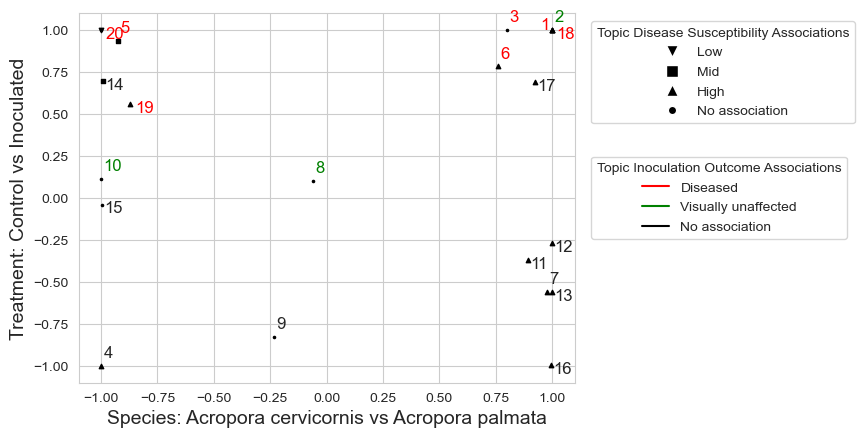

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots()

x_c = sptr['Species']
y_c = sptr['Treatment']
types = sptr['Topic']
types = [types[i].split()[1] for i in range(len(types))]
for i,type in enumerate(types):
    x = x_c[i]
    y = y_c[i]
    if int(type) == 20:
        plt.scatter(x, y, marker="v", color='black', s = 10)
    if int(type) == 5 or int(type) == 14:
        plt.scatter(x, y, marker='s', color='black', s = 10)
    if int(type) == 1 or int(type) == 2 or int(type) == 4 or int(type) == 6 or int(type) == 7 or int(type) == 12 or int(type) == 13 or int(type) == 16 or int(type) == 18 or int(type) == 19 or int(type) == 11 or int(type) == 17:
        plt.scatter(x, y, marker="^", color='black', s = 10)
    else:
        plt.scatter(x, y, marker='.', color='black', s = 10)
        
    if int(type) == 1:
        plt.text(x-0.05, y, type, fontsize=12, color = 'red')
    elif int(type) == 2 or int(type) == 8 or int(type) == 10:
        plt.text(x+0.01, y+0.05, type, fontsize=12, color = 'green')
    elif int(type) == 3 or int(type) == 6 or int(type) == 5:
        plt.text(x+0.01, y+0.05, type, fontsize=12, color = 'red')
    elif int(type) < 10:
        plt.text(x+0.01, y+0.05, type, fontsize=12)
    elif int(type) == 20 or int(type) == 18 or int(type) == 19:
        plt.text(x+0.02, y-0.05, type, fontsize=12, color = 'red')
    else:
        plt.text(x+0.01, y-0.05, type, fontsize=12)
        
legend_elements1 = [Line2D([0], [0], marker='v', color = 'white', label='Low', markersize=8, markerfacecolor='black'),
                   Line2D([0], [0], marker='s', color = 'white', label='Mid',
                           markerfacecolor='black', markersize=8),
                   Line2D([0], [0], marker='^', color = 'white', label='High',
                           markerfacecolor='black', markersize=8),
                    Line2D([0], [0], marker='.', color = 'white', label='No association',
                           markerfacecolor='black', markersize=12)]

legend_elements2 = [Line2D([0], [0], color = 'red', label='Diseased',
                          markerfacecolor='black', markersize=10),
                   Line2D([0], [0], color = 'green', label='Visually unaffected',
                          markerfacecolor='black', markersize=10),
                   Line2D([0], [0], color = 'black', label='No association',
                          markerfacecolor='black', markersize=10)]

leg1 = ax.legend(handles=legend_elements1, loc = 'center left', bbox_to_anchor = (1.02, 0.84), ncol = 1, title = 'Topic Disease Susceptibility Associations')
leg2 = ax.legend(handles=legend_elements2, loc = 'center left', bbox_to_anchor = (1.02, 0.5), ncol = 1, title = 'Topic Inoculation Outcome Associations')
ax.add_artist(leg1)        

plt.xlabel('Species: Acropora cervicornis vs Acropora palmata', fontsize=14);
plt.ylabel('Treatment: Control vs Inoculated', fontsize=14);
#plt.savefig('./upd_images/coral_1.eps', format='eps', bbox_inches='tight')
plt.show();

In [42]:
#taxa prob. distributions in topics (first 20 probable)
for i in range(NTOPICS):
    topic_name = 'Topic ' + str(i+1)
    print(topic_name)
    print(df_norm[topic_name].sort_values(ascending = False)[0:20])
    print("----------------------")

Topic 1
Taxonomy
d__Bacteria_p__Bacteroidetes_c__Bacteroidia_o__Cytophagales_f__Cyclobacteriaceae_g__Fulvivirga_s__uncultured-bacterium                                     0.415513
d__Bacteria_p__Spirochaetes_c__Spirochaetia_o__Spirochaetales_f__Spirochaetaceae_g__Spirochaeta-2                                                          0.254077
d__Bacteria_p__Cyanobacteria_c__Oxyphotobacteria_o__Phormidesmiales_f__Phormidesmiaceae                                                                    0.124838
d__Bacteria_p__Proteobacteria_c__Alphaproteobacteria                                                                                                       0.048024
d__Bacteria_p__Proteobacteria                                                                                                                              0.033011
d__Bacteria_p__Proteobacteria_c__Gammaproteobacteria_o__Betaproteobacteriales_f__Burkholderiaceae_g__Cupriavidus                                           0.025032

In [43]:
#taxa relative amplifications in topics (first 20 probable)
for i in range(NTOPICS):
    topic_name = 'Topic ' + str(i+1)
    print(topic_name)
    print(s[topic_name].sort_values(ascending = False)[0:20])
    print("----------------------")

Topic 1
Taxonomy
d__Bacteria_p__Bacteroidetes_c__Bacteroidia_o__Flavobacteriales_f__Flavobacteriaceae                                                                                                          0.012866
d__Bacteria_p__Proteobacteria_c__Alphaproteobacteria_o__Thalassobaculales_f__Thalassobaculaceae_g__Thalassobaculum_s__bacterium-DG949                                                         0.012866
d__Bacteria_p__Proteobacteria_c__Alphaproteobacteria                                                                                                                                          0.012865
d__Bacteria_p__Planctomycetes_c__Planctomycetacia_o__Isosphaerales_f__Isosphaeraceae_g__Paludisphaera_s__uncultured-bacterium                                                                 0.012809
d__Bacteria_p__Proteobacteria_c__Deltaproteobacteria_o__Oligoflexales_f__Oligoflexaceae_g__uncultured_s__uncultured-marine-bacterium                                                       

In [44]:
print("Skewness of average topic abundances towards Outcome")
potsvstopics = df.iloc[:, np.r_[2:NTOPICS+2, NTOPICS+6]]


ws0 = potsvstopics[potsvstopics['Outcome'] == 'Control']
del ws0['Outcome']
ws1 = potsvstopics[potsvstopics['Outcome'] == 'Diseased']
del ws1['Outcome']
ws2 = potsvstopics[potsvstopics['Outcome'] == 'VisuallyHealthy']
del ws2['Outcome']


ws_df = pd.concat([pd.DataFrame(ws0.sum(axis = 0)/np.sum(ws0.sum(axis = 0))), pd.DataFrame(ws1.sum(axis = 0)/np.sum(ws1.sum(axis = 0))), pd.DataFrame(ws2.sum(axis = 0)/np.sum(ws2.sum(axis = 0)))], axis = 1)
ws_df.columns = ['Control', 'Diseased', 'VisuallyHealthy']
ws_df

t = ws_df.T
t = t.div(t.sum())
t = t.T




test = potsvstopics.loc[:, topic_names]
test = pd.DataFrame(test.mean(axis=0))

sns.set_style("whitegrid")

c = t
c['Abundance'] = test
c['dummy_column_for_size'] = 1    
c['Topic'] = range(1,NTOPICS+1)
c.columns = ['Control', 'Diseased', 'VisuallyHealthy', 'Abundance', 'dummy_size', 'Topic']
print("Normalized topic abundances: each row (topic) sums up to 1")
c
color_discrete_map={"CustomColor": 'red'}
fig = px.scatter_ternary(c, a="Control", b="Diseased", c="VisuallyHealthy", size = 'Abundance', size_max=20, text="Topic")
fig = fig.update(layout=dict(title=dict(x=0.5)))
fig = fig.update_coloraxes(colorbar_title_side="bottom")
fig = fig.update_traces(textposition='middle right', textfont_size=12, hovertext = 'Abundance', selector=dict(type='scatterternary'), marker=dict(
        color='lightblue'))
#fig.write_image("./mallet_res/de_images/plot_ternary_phylum_6_trait.eps")
fig.show()

Skewness of average topic abundances towards Outcome


Control      Diseased  VisuallyHealthy
Topic 1   0.000009  3.314215e-02     2.161544e-06
Topic 2   0.000005  1.051863e-06     4.143971e-02
Topic 3   0.000005  4.125617e-02     6.970075e-05
Topic 4   0.027902  3.167345e-08     3.167391e-08
Topic 5   0.001453  3.065477e-02     1.227917e-02
Topic 6   0.006489  4.971529e-02     4.948738e-03
Topic 7   0.187763  1.078788e-01     5.207523e-02
Topic 8   0.057279  2.624801e-02     1.107153e-01
Topic 9   0.000503  2.914281e-05     1.572271e-04
Topic 10  0.071137  3.050825e-02     1.425679e-01
Topic 11  0.080156  2.517516e-02     8.261358e-02
Topic 12  0.026213  3.148656e-02     3.735932e-03
Topic 13  0.063497  5.035178e-02     3.051882e-05
Topic 14  0.016869  6.298107e-02     4.541183e-02
Topic 15  0.417511  3.661363e-01     4.446430e-01
Topic 16  0.024914  3.420217e-06     2.105002e-04
Topic 17  0.015581  4.337282e-02     5.875447e-02
Topic 18  0.000002  3.322544e-02     9.642487e-06
Topic 19  0.002699  1.084219e-02     2.773964e-04
Topic 20  0.000012  5.699158e-02     5.796924e-05

Normalized topic abundances: each row (topic) sums up to 1


Control  Diseased  VisuallyHealthy  Abundance  dummy_size  Topic
Topic 1   0.000259  0.999676         0.000065   0.010470           1      1
Topic 2   0.000116  0.000025         0.999859   0.010471           1      2
Topic 3   0.000124  0.998190         0.001686   0.013048           1      3
Topic 4   0.999998  0.000001         0.000001   0.011748           1      4
Topic 5   0.032726  0.690632         0.276642   0.013394           1      5
Topic 6   0.106112  0.812964         0.080924   0.019682           1      6
Topic 7   0.539989  0.310248         0.149763   0.126281           1      7
Topic 8   0.294885  0.135130         0.569985   0.060377           1      8
Topic 9   0.729516  0.042296         0.228188   0.010765           1      9
Topic 10  0.291292  0.124925         0.583784   0.075604           1     10
Topic 11  0.426488  0.133949         0.439562   0.062583           1     11
Topic 12  0.426675  0.512514         0.060811   0.021924           1     12
Topic 13  0.557583  0.442149         0.000268   0.042644           1     13
Topic 14  0.134669  0.502796         0.362535   0.038464           1     14
Topic 15  0.339913  0.298086         0.362001   0.403757           1     15
Topic 16  0.991487  0.000136         0.008377   0.010544           1     16
Topic 17  0.132371  0.368477         0.499152   0.035100           1     17
Topic 18  0.000062  0.999648         0.000290   0.010496           1     18
Topic 19  0.195335  0.784591         0.020074   0.004630           1     19
Topic 20  0.000207  0.998777         0.001016   0.018017           1     20

In [45]:
print("Skewness of average topic abundances towards Susceptibility")
potsvstopics = df.iloc[:, np.r_[2:NTOPICS+2, NTOPICS+7]]


ws0 = potsvstopics[potsvstopics['Susceptibility'] == 'High']
del ws0['Susceptibility']
ws1 = potsvstopics[potsvstopics['Susceptibility'] == 'Mid']
del ws1['Susceptibility']
ws2 = potsvstopics[potsvstopics['Susceptibility'] == 'Low']
del ws2['Susceptibility']


ws_df = pd.concat([pd.DataFrame(ws0.sum(axis = 0)/np.sum(ws0.sum(axis = 0))), pd.DataFrame(ws1.sum(axis = 0)/np.sum(ws1.sum(axis = 0))), pd.DataFrame(ws2.sum(axis = 0)/np.sum(ws2.sum(axis = 0)))], axis = 1)
ws_df.columns = ['High', 'Mid', 'Low']
ws_df

t = ws_df.T
t = t.div(t.sum())
t = t.T




test = potsvstopics.loc[:, topic_names]
test = pd.DataFrame(test.mean(axis=0))

sns.set_style("whitegrid")

c = t
c['Abundance'] = test
c['dummy_column_for_size'] = 1    
c['Topic'] = range(1,NTOPICS+1)
c.columns = ['High', 'Mid', 'Low', 'Abundance', 'dummy_size', 'Topic']
print("Normalized topic abundances: each row (topic) sums up to 1")
c
color_discrete_map={"CustomColor": 'red'}
fig = px.scatter_ternary(c, a="High", b="Mid", c="Low", size = 'Abundance', size_max=20, text="Topic")
fig = fig.update(layout=dict(title=dict(x=0.5)))
fig = fig.update_coloraxes(colorbar_title_side="bottom")
fig = fig.update_traces(textposition='middle right', textfont_size=12, hovertext = 'Abundance', selector=dict(type='scatterternary'), marker=dict(
        color='lightblue'))
#fig.write_image("./mallet_res/de_images/plot_ternary_phylum_6_trait.eps")
fig.show()

Skewness of average topic abundances towards Susceptibility


High       Mid           Low
Topic 1   0.020718  0.000004  3.411491e-06
Topic 2   0.020723  0.000003  5.188121e-08
Topic 3   0.019147  0.011434  2.011795e-05
Topic 4   0.023219  0.000056  3.167354e-08
Topic 5   0.001126  0.036478  1.094422e-02
Topic 6   0.037071  0.002213  1.578797e-03
Topic 7   0.240313  0.011394  7.923665e-03
Topic 8   0.042332  0.098850  5.200391e-02
Topic 9   0.000159  0.000495  1.812558e-04
Topic 10  0.000128  0.145839  1.718187e-01
Topic 11  0.111294  0.014933  1.022348e-02
Topic 12  0.043357  0.000031  4.408862e-05
Topic 13  0.084393  0.000007  6.213475e-06
Topic 14  0.000505  0.108786  3.243550e-02
Topic 15  0.228476  0.558641  6.526217e-01
Topic 16  0.020741  0.000036  2.861930e-04
Topic 17  0.061438  0.010780  4.649300e-03
Topic 18  0.020766  0.000006  6.725717e-06
Topic 19  0.009133  0.000013  6.309418e-05
Topic 20  0.014961  0.000002  5.518958e-02

Normalized topic abundances: each row (topic) sums up to 1


High       Mid       Low  Abundance  dummy_size  Topic
Topic 1   0.999625  0.000211  0.000165   0.010470           1      1
Topic 2   0.999857  0.000140  0.000003   0.010471           1      2
Topic 3   0.625702  0.373641  0.000657   0.013048           1      3
Topic 4   0.997603  0.002395  0.000001   0.011748           1      4
Topic 5   0.023201  0.751371  0.225428   0.013394           1      5
Topic 6   0.907215  0.054148  0.038637   0.019682           1      6
Topic 7   0.925594  0.043887  0.030519   0.126281           1      7
Topic 8   0.219124  0.511684  0.269192   0.060377           1      8
Topic 9   0.190233  0.592772  0.216995   0.010765           1      9
Topic 10  0.000402  0.458924  0.540674   0.075604           1     10
Topic 11  0.815637  0.109438  0.074925   0.062583           1     11
Topic 12  0.998281  0.000704  0.001015   0.021924           1     12
Topic 13  0.999841  0.000086  0.000074   0.042644           1     13
Topic 14  0.003562  0.767578  0.228861   0.038464           1     14
Topic 15  0.158693  0.388016  0.453292   0.403757           1     15
Topic 16  0.984713  0.001700  0.013588   0.010544           1     16
Topic 17  0.799278  0.140237  0.060485   0.035100           1     17
Topic 18  0.999381  0.000295  0.000324   0.010496           1     18
Topic 19  0.991718  0.001431  0.006851   0.004630           1     19
Topic 20  0.213269  0.000026  0.786705   0.018017           1     20

In [52]:
#JUMP


#df_norm['Taxonomy'] = df_norm.index

# phylum = []
# cclass = []
# order = []
# family = []
# genus = []
# species = []
# df_norm
# for i in range(df_norm.shape[0]):
#     phylum.append(df_norm['Taxonomy'][i].split('__')[0])
#     j = 1
#     while (j < len(df_norm['Taxonomy'][i].split('__'))):
#         if j == 1:
#             cclass.append(df_norm['Taxonomy'][i].split('__')[1])
#         if j == 2:
#             order.append(df_norm['Taxonomy'][i].split('__')[2]) 
#         if j == 3:
#             family.append(df_norm['Taxonomy'][i].split('__')[3])
#         if j == 4:
#             genus.append(df_norm['Taxonomy'][i].split('__')[4])
#         if j == 5:
#             species.append(df_norm['Taxonomy'][i].split('__')[5])
#         j = j + 1
#     if j == 1:
#         cclass.append("NA")
#         order.append("NA")
#         family.append("NA")
#         genus.append("NA")
#         species.append("NA")
#     if j == 2:
#         order.append("NA")
#         family.append("NA")
#         genus.append("NA")
#         species.append("NA")
#     if j == 3:
#         family.append("NA")
#         genus.append("NA")
#         species.append("NA")
#     if j == 4:
#         genus.append("NA")
#         species.append("NA")
#     if j == 5:
#         species.append("NA")

    
# df_norm.insert(0, 'Species', species)
# df_norm.insert(0, 'Genus', genus)
# df_norm.insert(0, 'Family', family)
# df_norm.insert(0, 'Order', order)
# df_norm.insert(0, 'Class', cclass)
# df_norm.insert(0, 'Phylum', phylum)


# del df_norm['Taxonomy']
# df_norm

In [46]:
df_norm['Taxonomy'] = df_norm.index

kingdom = []
phylum = []
cclass = []
order = []
family = []
genus = []
species = []

for i in range(df_norm.shape[0]):
    
    kingdom.append(df_norm['Taxonomy'][i].split('d__')[1].split('_p')[0])
    if len(df_norm['Taxonomy'][i].split('p__')) > 1:
        phylum.append(df_norm['Taxonomy'][i].split('p__')[1].split('_c')[0])
    else:
        phylum.append("NA")
    if len(df_norm['Taxonomy'][i].split('c__')) > 1:
        cclass.append(df_norm['Taxonomy'][i].split('c__')[1].split('_o')[0])
    else:
        cclass.append('NA')
    if len(df_norm['Taxonomy'][i].split('o__')) > 1:
        order.append(df_norm['Taxonomy'][i].split('o__')[1].split('_f')[0]) 
    else:
        order.append('NA')
    if len(df_norm['Taxonomy'][i].split('f__')) > 1:
        family.append(df_norm['Taxonomy'][i].split('f__')[1].split('_g')[0])
    else:
        family.append('NA')
    if len(df_norm['Taxonomy'][i].split('g__')) > 1:
        genus.append(df_norm['Taxonomy'][i].split('g__')[1].split('_s')[0])
    else:
        genus.append('NA')
    if len(df_norm['Taxonomy'][i].split('s__')) > 1:
        species.append(df_norm['Taxonomy'][i].split('s__')[1])
    else:
        species.append('NA')   
df_norm.insert(0, 'Species', species)
df_norm.insert(0, 'Genus', genus)
df_norm.insert(0, 'Family', family)
df_norm.insert(0, 'Order', order)
df_norm.insert(0, 'Class', cclass)
df_norm.insert(0, 'Phylum', phylum)
df_norm.insert(0, 'Kingdom', kingdom)

del df_norm['Taxonomy']
df_norm

Kingdom          Phylum  \
Taxonomy                                                                       
d__Bacteria_p__Cyanobacteria_c__Oxyphotobacteri...  Bacteria   Cyanobacteria   
d__Bacteria_p__Proteobacteria_c__Alphaproteobac...  Bacteria  Proteobacteria   
d__Bacteria_p__Planctomycetes_c__Planctomycetac...  Bacteria  Planctomycetes   
d__Bacteria                                         Bacteria              NA   
d__Bacteria_p__Proteobacteria_c__Alphaproteobac...  Bacteria  Proteobacteria   
...                                                      ...             ...   
d__Bacteria_p__Cyanobacteria_c__Oxyphotobacteri...  Bacteria   Cyanobacteria   
d__Bacteria_p__Proteobacteria_c__Alphaproteobac...  Bacteria  Proteobacteria   
d__Bacteria_p__Cyanobacteria_c__Oxyphotobacteri...  Bacteria   Cyanobacteria   
d__Bacteria_p__Spirochaetes_c__Spirochaetia_o__...  Bacteria    Spirochaetes   
d__Bacteria_p__Proteobacteria_c__Alphaproteobac...  Bacteria  Proteobacteria   

                                                                  Class  \
Taxonomy                                                                  
d__Bacteria_p__Cyanobacteria_c__Oxyphotobacteri...     Oxyphotobacteria   
d__Bacteria_p__Proteobacteria_c__Alphaproteobac...  Alphaproteobacteria   
d__Bacteria_p__Planctomycetes_c__Planctomycetac...     Planctomycetacia   
d__Bacteria                                                          NA   
d__Bacteria_p__Proteobacteria_c__Alphaproteobac...  Alphaproteobacteria   
...                                                                 ...   
d__Bacteria_p__Cyanobacteria_c__Oxyphotobacteri...     Oxyphotobacteria   
d__Bacteria_p__Proteobacteria_c__Alphaproteobac...  Alphaproteobacteria   
d__Bacteria_p__Cyanobacteria_c__Oxyphotobacteri...     Oxyphotobacteria   
d__Bacteria_p__Spirochaetes_c__Spirochaetia_o__...         Spirochaetia   
d__Bacteria_p__Proteobacteria_c__Alphaproteobac...  Alphaproteobacteria   

                                                               Order  \
Taxonomy                                                               
d__Bacteria_p__Cyanobacteria_c__Oxyphotobacteri...   Phormidesmiales   
d__Bacteria_p__Proteobacteria_c__Alphaproteobac...   Caulobacterales   
d__Bacteria_p__Planctomycetes_c__Planctomycetac...  Planctomycetales   
d__Bacteria                                                       NA   
d__Bacteria_p__Proteobacteria_c__Alphaproteobac...       Rhizobiales   
...                                                              ...   
d__Bacteria_p__Cyanobacteria_c__Oxyphotobacteri...   Phormidesmiales   
d__Bacteria_p__Proteobacteria_c__Alphaproteobac...  Rhodovibrionales   
d__Bacteria_p__Cyanobacteria_c__Oxyphotobacteri...        Nostocales   
d__Bacteria_p__Spirochaetes_c__Spirochaetia_o__...    Spirochaetales   
d__Bacteria_p__Proteobacteria_c__Alphaproteobac...  Rhodospirillales   

                                                                     Family  \
Taxonomy                                                                      
d__Bacteria_p__Cyanobacteria_c__Oxyphotobacteri...         Phormidesmiaceae   
d__Bacteria_p__Proteobacteria_c__Alphaproteobac...         Parvularculaceae   
d__Bacteria_p__Planctomycetes_c__Planctomycetac...        Rubinisphaeraceae   
d__Bacteria                                                              NA   
d__Bacteria_p__Proteobacteria_c__Alphaproteobac...             Rhizobiaceae   
...                                                                     ...   
d__Bacteria_p__Cyanobacteria_c__Oxyphotobacteri...         Phormidesmiaceae   
d__Bacteria_p__Proteobacteria_c__Alphaproteobac...           Kiloniellaceae   
d__Bacteria_p__Cyanobacteria_c__Oxyphotobacteri...                       NA   
d__Bacteria_p__Spirochaetes_c__Spirochaetia_o__...          Spirochaetaceae   
d__Bacteria_p__Proteobacteria_c__Alphaproteobac...  AEGEAN-169-marine-group   

                                                                    Gen

In [47]:
agg_f = df_norm.groupby(['Family']).agg(np.sum)
agg_p = df_norm.groupby(['Phylum']).agg(np.sum)
agg_g = df_norm.groupby(['Genus']).agg(np.sum)
agg_s = df_norm.groupby(['Species']).agg(np.sum)
agg_f

Topic 1       Topic 2  \
Family                                                             
01D2Z36                               8.945403e-08  8.944863e-08   
0319-6G20                             1.789081e-07  7.051711e-05   
4572-13                               8.945403e-08  8.944863e-08   
67-14                                 8.945403e-08  8.944863e-08   
A4b                                   2.057443e-06  2.057319e-06   
...                                            ...           ...   
uncultured-planctomycete              2.683621e-07  2.683459e-07   
uncultured-proteobacterium            1.789081e-07  1.788973e-07   
uncultured-sediment-bacterium         1.789081e-07  1.788973e-07   
uncultured-soil-bacterium             1.789081e-07  2.111935e-04   
unidentified-marine-bacterioplankton  8.137537e-05  9.839350e-07   

                                           Topic 3       Topic 4  \
Family                                                             
01D2Z36                               7.179194e-08  7.974130e-08   
0319-6G20                             1.435839e-07  1.594826e-07   
4572-13                               7.179194e-08  7.974130e-08   
67-14                                 7.179194e-08  7.974130e-08   
A4b                                   3.993742e-03  9.961533e-04   
...                                            ...           ...   
uncultured-planctomycete              2.153758e-07  2.392239e-07   
uncultured-proteobacterium            1.435839e-07  1.594826e-07   
uncultured-sediment-bacterium         1.435839e-07  8.077996e-05   
uncultured-soil-bacterium             1.435839e-07  1.594826e-07   
unidentified-marine-bacterioplankton  7.897113e-07  8.771543e-07   

                                           Topic 5       Topic 6  \
Family                                                             
01D2Z36                               6.993740e-08  4.759862e-08   
0319-6G20                             1.398748e-07  9.519723e-08   
4572-13                               6.993740e-08  4.759862e-08   
67-14                                 6.993740e-08  4.759862e-08   
A4b                                   2.373035e-04  3.593468e-04   
...                                            ...           ...   
uncultured-planctomycete              2.098122e-07  1.427958e-07   
uncultured-proteobacterium            1.398748e-07  9.519723e-08   
uncultured-sediment-bacterium         1.398748e-07  9.519723e-08   
uncultured-soil-bacterium             1.398748e-07  9.519723e-08   
unidentified-marine-bacterioplankton  7.693114e-07  6.314750e-04   

                                           Topic 7       Topic 8  \
Family                                                             
01D2Z36                               7.420306e-09  1.551872e-08   
0319-6G20                             8.350528e-06  3.103745e-08   
4572-13                               7.420306e-09  1.551872e-08   
67-14                                 7.420306e-09  1.551872e-08   
A4b                                   2.684487e-05  3.569307e-07   
...                                            ...           ...   
uncultured-planctomycete              2.002791e-05  4.655617e-08   
uncultured-proteobacterium            3.349115e-06  3.103745e-08   
uncultured-sediment-bacterium         1.484061e-08  3.103745e-08   
uncultured-soil-bacterium             1.484061e-08  3.103745e-08   
unidentified-marine-bacterioplankton  1.017770e-04  1.707060e-07   

                                           Topic 9      Topic 10  \
Family                                                             
01D2Z36                               8.701445e-08  1.239322e-08   
0319-6G20                             1.740289e-07  2.478644e-08   
4572-13                               8.701445e-08  1.239322e-08   
67-14                                 8.701445e-08  1.239322e-08   
A4b                                   2.001332e-06  1.281490e-05   
...                        

In [48]:
print('----CONTROL associated topics ---')
print("Control 9---------")

agg_g.loc[agg_g.index == 'Ralstonia', 'Topic 9']


print("Visually unaffected 8---------")
agg_g.loc[agg_g.index == 'Ralstonia', 'Topic 8']



print("---------")


----CONTROL associated topics ---
Control 9---------


Genus
Ralstonia    0.223601
Name: Topic 9, dtype: float64

Visually unaffected 8---------


Genus
Ralstonia    0.000317
Name: Topic 8, dtype: float64

---------


In [49]:
agg_g.loc[:, 'Topic 9'].sort_values(ascending = False)

Genus
Ralstonia                        2.236006e-01
Geobacillus                      1.673757e-01
Lawsonella                       1.348737e-01
Thermus                          1.267314e-01
Deinococcus                      1.080128e-01
                                     ...     
Crocosphaera-WH-0003-(UCYN-B)    8.701445e-08
Salinicola                       8.701445e-08
Croceicoccus                     8.701445e-08
Salinirepens                     8.701445e-08
Sediminibacterium                8.701445e-08
Name: Topic 9, Length: 591, dtype: float64

In [50]:
print('----ACROPORA CERVICORNIS associated topics ---')
print("Control ---------")

agg_f.loc[agg_f.index == 'Midichloriaceae', 'Topic 4']
agg_f.loc[agg_f.index == 'P3OB-42', 'Topic 4']
agg_f.loc[agg_f.index == 'Endozoicomonadaceae', 'Topic 4']
agg_f.loc[agg_f.index == 'Cyanobiaceae', 'Topic 4']
agg_s.loc[agg_s.index == 'Sphingobium-yanoikuyae', 'Topic 4']
agg_g.loc[agg_g.index == 'Vibrio', 'Topic 4']

print("Visually unaffected ---------")

agg_f.loc[agg_f.index == 'Midichloriaceae', 'Topic 10']
agg_f.loc[agg_f.index == 'P3OB-42', 'Topic 10']
agg_f.loc[agg_f.index == 'Endozoicomonadaceae', 'Topic 10']
agg_s.loc[agg_s.index == 'Sphingobium-yanoikuyae', 'Topic 10']
agg_g.loc[agg_g.index == 'Vibrio', 'Topic 10']


print("Diseased low susceptibility---------")

agg_f.loc[agg_f.index == 'Midichloriaceae', 'Topic 20']
agg_f.loc[agg_f.index == 'Endozoicomonadaceae', 'Topic 20']
agg_f.loc[agg_f.index == 'P3OB-42', 'Topic 20']
agg_f.loc[agg_f.index == 'Cyanobiaceae', 'Topic 20']
agg_s.loc[agg_s.index == 'Sphingobium-yanoikuyae', 'Topic 20']
agg_g.loc[agg_g.index == 'Vibrio', 'Topic 20']



print("Diseased med susceptibility---------")

agg_f.loc[agg_f.index == 'Midichloriaceae', 'Topic 5']
agg_f.loc[agg_f.index == 'Endozoicomonadaceae', 'Topic 5']
agg_f.loc[agg_f.index == 'P3OB-42', 'Topic 5']
agg_f.loc[agg_f.index == 'Cyanobiaceae', 'Topic 5']
agg_s.loc[agg_s.index == 'Sphingobium-yanoikuyae', 'Topic 5']
agg_g.loc[agg_g.index == 'Vibrio', 'Topic 5']



print("Diseased high susceptibility---------")

agg_f.loc[agg_f.index == 'Midichloriaceae', 'Topic 19']
agg_f.loc[agg_f.index == 'Endozoicomonadaceae', 'Topic 19']
agg_f.loc[agg_f.index == 'P3OB-42', 'Topic 19']
agg_f.loc[agg_f.index == 'Cyanobiaceae', 'Topic 19']
agg_s.loc[agg_s.index == 'Sphingobium-yanoikuyae', 'Topic 19']
agg_g.loc[agg_g.index == 'Vibrio', 'Topic 19']

print("---------")


----ACROPORA CERVICORNIS associated topics ---
Control ---------


Family
Midichloriaceae    0.790475
Name: Topic 4, dtype: float64

Family
P3OB-42    0.062169
Name: Topic 4, dtype: float64

Family
Endozoicomonadaceae    0.020569
Name: Topic 4, dtype: float64

Family
Cyanobiaceae    0.001211
Name: Topic 4, dtype: float64

Species
Sphingobium-yanoikuyae    1.594826e-07
Name: Topic 4, dtype: float64

Genus
Vibrio    0.00277
Name: Topic 4, dtype: float64

Visually unaffected ---------


Family
Midichloriaceae    0.855847
Name: Topic 10, dtype: float64

Family
P3OB-42    0.001543
Name: Topic 10, dtype: float64

Family
Endozoicomonadaceae    0.005724
Name: Topic 10, dtype: float64

Species
Sphingobium-yanoikuyae    0.000238
Name: Topic 10, dtype: float64

Genus
Vibrio    0.002126
Name: Topic 10, dtype: float64

Diseased low susceptibility---------


Family
Midichloriaceae    0.265411
Name: Topic 20, dtype: float64

Family
Endozoicomonadaceae    0.000002
Name: Topic 20, dtype: float64

Family
P3OB-42    0.000299
Name: Topic 20, dtype: float64

Family
Cyanobiaceae    0.001053
Name: Topic 20, dtype: float64

Species
Sphingobium-yanoikuyae    1.039966e-07
Name: Topic 20, dtype: float64

Genus
Vibrio    0.030084
Name: Topic 20, dtype: float64

Diseased med susceptibility---------


Family
Midichloriaceae    0.000016
Name: Topic 5, dtype: float64

Family
Endozoicomonadaceae    0.00067
Name: Topic 5, dtype: float64

Family
P3OB-42    0.000072
Name: Topic 5, dtype: float64

Family
Cyanobiaceae    0.000206
Name: Topic 5, dtype: float64

Species
Sphingobium-yanoikuyae    0.000126
Name: Topic 5, dtype: float64

Genus
Vibrio    0.449362
Name: Topic 5, dtype: float64

Diseased high susceptibility---------


Family
Midichloriaceae    0.320901
Name: Topic 19, dtype: float64

Family
Endozoicomonadaceae    0.556266
Name: Topic 19, dtype: float64

Family
P3OB-42    0.028056
Name: Topic 19, dtype: float64

Family
Cyanobiaceae    0.010476
Name: Topic 19, dtype: float64

Species
Sphingobium-yanoikuyae    0.00904
Name: Topic 19, dtype: float64

Genus
Vibrio    0.000461
Name: Topic 19, dtype: float64

---------


In [51]:
print('----ACROPORA PALMATA associated topics ---')
print("Control 7---------")

agg_f.loc[agg_f.index == 'Spirochaetaceae', 'Topic 7']
agg_f.loc[agg_f.index == 'Endozoicomonadaceae', 'Topic 7']
agg_f.loc[agg_f.index == 'Midichloriaceae', 'Topic 7']
agg_s.loc[agg_s.index == 'Sphingobium-yanoikuyae', 'Topic 7']
agg_g.loc[agg_g.index == 'HIMB11', 'Topic 7']
agg_f.loc[agg_f.index == 'Cryomorphaceae', 'Topic 7']

print("Control 13---------")

agg_f.loc[agg_f.index == 'Spirochaetaceae', 'Topic 13']
agg_f.loc[agg_f.index == 'Endozoicomonadaceae', 'Topic 13']
agg_f.loc[agg_f.index == 'Midichloriaceae', 'Topic 13']
agg_s.loc[agg_s.index == 'Sphingobium-yanoikuyae', 'Topic 13']
agg_g.loc[agg_g.index == 'HIMB11', 'Topic 13']
agg_f.loc[agg_f.index == 'Cryomorphaceae', 'Topic 13']

print("Control 16---------")

agg_f.loc[agg_f.index == 'Spirochaetaceae', 'Topic 16']
agg_f.loc[agg_f.index == 'Endozoicomonadaceae', 'Topic 16']
agg_f.loc[agg_f.index == 'Midichloriaceae', 'Topic 16']
agg_s.loc[agg_s.index == 'Sphingobium-yanoikuyae', 'Topic 16']
agg_g.loc[agg_g.index == 'HIMB11', 'Topic 16']
agg_f.loc[agg_f.index == 'Cryomorphaceae', 'Topic 16']


print("Visually unaffected ---------")

agg_f.loc[agg_f.index == 'Spirochaetaceae', 'Topic 2']
agg_p.loc[agg_p.index == 'Proteobacteria', 'Topic 2']
agg_f.loc[agg_f.index == 'P3OB-42', 'Topic 2']
agg_f.loc[agg_f.index == 'Midichloriaceae', 'Topic 2']
agg_s.loc[agg_s.index == 'Sphingobium-yanoikuyae', 'Topic 2']
agg_g.loc[agg_g.index == 'HIMB11', 'Topic 2']
agg_f.loc[agg_f.index == 'Cryomorphaceae', 'Topic 2']

print("Diseased 1---------")

agg_f.loc[agg_f.index == 'Spirochaetaceae', 'Topic 1']
agg_f.loc[agg_f.index == 'Endozoicomonadaceae', 'Topic 1']
agg_f.loc[agg_f.index == 'Midichloriaceae', 'Topic 1']
agg_f.loc[agg_f.index == 'Cyanobiaceae', 'Topic 1']
agg_s.loc[agg_s.index == 'Sphingobium-yanoikuyae', 'Topic 1']
agg_g.loc[agg_g.index == 'HIMB11', 'Topic 1']
agg_f.loc[agg_f.index == 'Cryomorphaceae', 'Topic 1']

print("Diseased 3---------")

agg_f.loc[agg_f.index == 'Spirochaetaceae', 'Topic 3']
agg_f.loc[agg_f.index == 'Endozoicomonadaceae', 'Topic 3']
agg_f.loc[agg_f.index == 'Midichloriaceae', 'Topic 3']
agg_f.loc[agg_f.index == 'Cyanobiaceae', 'Topic 3']
agg_s.loc[agg_s.index == 'Sphingobium-yanoikuyae', 'Topic 3']
agg_g.loc[agg_g.index == 'HIMB11', 'Topic 3']
agg_f.loc[agg_f.index == 'Cryomorphaceae', 'Topic 3']

print("Diseased 6---------")

agg_f.loc[agg_f.index == 'Spirochaetaceae', 'Topic 6']
agg_f.loc[agg_f.index == 'Endozoicomonadaceae', 'Topic 6']
agg_f.loc[agg_f.index == 'Midichloriaceae', 'Topic 6']
agg_f.loc[agg_f.index == 'Cyanobiaceae', 'Topic 6']
agg_s.loc[agg_s.index == 'Sphingobium-yanoikuyae', 'Topic 6']
agg_g.loc[agg_g.index == 'HIMB11', 'Topic 6']
agg_f.loc[agg_f.index == 'Cryomorphaceae', 'Topic 6']

print("Diseased 18---------")

agg_f.loc[agg_f.index == 'Spirochaetaceae', 'Topic 18']
agg_f.loc[agg_f.index == 'Endozoicomonadaceae', 'Topic 18']
agg_f.loc[agg_f.index == 'Midichloriaceae', 'Topic 18']
agg_f.loc[agg_f.index == 'Cyanobiaceae', 'Topic 18']
agg_s.loc[agg_s.index == 'Sphingobium-yanoikuyae', 'Topic 18']
agg_g.loc[agg_g.index == 'HIMB11', 'Topic 18']
agg_f.loc[agg_f.index == 'Cryomorphaceae', 'Topic 18']

print("---------")


----ACROPORA PALMATA associated topics ---
Control 7---------


Family
Spirochaetaceae    0.907331
Name: Topic 7, dtype: float64

Family
Endozoicomonadaceae    0.000148
Name: Topic 7, dtype: float64

Family
Midichloriaceae    2.968123e-08
Name: Topic 7, dtype: float64

Species
Sphingobium-yanoikuyae    8.484093e-07
Name: Topic 7, dtype: float64

Genus
HIMB11    0.000067
Name: Topic 7, dtype: float64

Family
Cryomorphaceae    0.00055
Name: Topic 7, dtype: float64

Control 13---------


Family
Spirochaetaceae    0.675098
Name: Topic 13, dtype: float64

Family
Endozoicomonadaceae    0.251693
Name: Topic 13, dtype: float64

Family
Midichloriaceae    0.002231
Name: Topic 13, dtype: float64

Species
Sphingobium-yanoikuyae    4.394391e-08
Name: Topic 13, dtype: float64

Genus
HIMB11    0.000232
Name: Topic 13, dtype: float64

Family
Cryomorphaceae    0.000512
Name: Topic 13, dtype: float64

Control 16---------


Family
Spirochaetaceae    0.001897
Name: Topic 16, dtype: float64

Family
Endozoicomonadaceae    0.000252
Name: Topic 16, dtype: float64

Family
Midichloriaceae    3.552671e-07
Name: Topic 16, dtype: float64

Species
Sphingobium-yanoikuyae    1.776335e-07
Name: Topic 16, dtype: float64

Genus
HIMB11    3.552671e-07
Name: Topic 16, dtype: float64

Family
Cryomorphaceae    0.00167
Name: Topic 16, dtype: float64

Visually unaffected ---------


Family
Spirochaetaceae    0.149872
Name: Topic 2, dtype: float64

Phylum
Proteobacteria    0.232884
Name: Topic 2, dtype: float64

Family
P3OB-42    0.000334
Name: Topic 2, dtype: float64

Family
Midichloriaceae    0.00001
Name: Topic 2, dtype: float64

Species
Sphingobium-yanoikuyae    1.788973e-07
Name: Topic 2, dtype: float64

Genus
HIMB11    0.000221
Name: Topic 2, dtype: float64

Family
Cryomorphaceae    0.000355
Name: Topic 2, dtype: float64

Diseased 1---------


Family
Spirochaetaceae    0.254079
Name: Topic 1, dtype: float64

Family
Endozoicomonadaceae    0.000143
Name: Topic 1, dtype: float64

Family
Midichloriaceae    3.578161e-07
Name: Topic 1, dtype: float64

Family
Cyanobiaceae    0.010996
Name: Topic 1, dtype: float64

Species
Sphingobium-yanoikuyae    0.000493
Name: Topic 1, dtype: float64

Genus
HIMB11    0.000814
Name: Topic 1, dtype: float64

Family
Cryomorphaceae    0.002616
Name: Topic 1, dtype: float64

Diseased 3---------


Family
Spirochaetaceae    0.002897
Name: Topic 3, dtype: float64

Family
Endozoicomonadaceae    0.000002
Name: Topic 3, dtype: float64

Family
Midichloriaceae    2.871678e-07
Name: Topic 3, dtype: float64

Family
Cyanobiaceae    0.000478
Name: Topic 3, dtype: float64

Species
Sphingobium-yanoikuyae    0.000186
Name: Topic 3, dtype: float64

Genus
HIMB11    2.871678e-07
Name: Topic 3, dtype: float64

Family
Cryomorphaceae    0.000116
Name: Topic 3, dtype: float64

Diseased 6---------


Family
Spirochaetaceae    9.043737e-07
Name: Topic 6, dtype: float64

Family
Endozoicomonadaceae    0.007338
Name: Topic 6, dtype: float64

Family
Midichloriaceae    1.903945e-07
Name: Topic 6, dtype: float64

Family
Cyanobiaceae    0.055701
Name: Topic 6, dtype: float64

Species
Sphingobium-yanoikuyae    9.519723e-08
Name: Topic 6, dtype: float64

Genus
HIMB11    0.005321
Name: Topic 6, dtype: float64

Family
Cryomorphaceae    0.007429
Name: Topic 6, dtype: float64

Diseased 18---------


Family
Spirochaetaceae    0.083685
Name: Topic 18, dtype: float64

Family
Endozoicomonadaceae    0.000654
Name: Topic 18, dtype: float64

Family
Midichloriaceae    0.00001
Name: Topic 18, dtype: float64

Family
Cyanobiaceae    0.000634
Name: Topic 18, dtype: float64

Species
Sphingobium-yanoikuyae    0.000421
Name: Topic 18, dtype: float64

Genus
HIMB11    3.569839e-07
Name: Topic 18, dtype: float64

Family
Cryomorphaceae    0.000194
Name: Topic 18, dtype: float64

---------
